<h1 style="background: linear-gradient(to right, #771C19, #771C19, #C0C4CC); color: white; font-style: italic; padding: 10px 20px; border-radius: 5px; text-align: left; font-weight:700;">
        Desempeño Académico IPN
</h1>


## Importación de librerías

In [ ]:
#! pip install gspread

In [ ]:
#LIBRERÍAS BÁSICAS
import pandas as pd
import numpy as np

#EDA
import matplotlib.pyplot as plt
import seaborn as sns

#PREPROCESAMIENTO
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#MODELADO
from sklearn.cluster import KMeans

#UTILS
import gspread

## Carga de Datos

In [ ]:
sa = gspread.service_account(filename='service_account.json')
sh = sa.open('ProyectoDM')

In [ ]:
worksheet = sh.sheet1
data = worksheet.get_all_records()
df = pd.DataFrame(data)

## EDA

### Vista previa de los datos

In [ ]:
df.head()

,Marca temporal,Dirección de correo electrónico,¿A qué escuela perteneces?,¿Cuál es tu promedio global?,¿Cuántas materias has reprobado a lo largo de tu trayectoria?,¿Qué edad tienes?,¿Cuál es tu género?,¿Tienes dependientes económicos?,¿Tienes personas a tu cuidado?,¿Te sientes apoyado por tu familia?,...,¿Eres foráneo?,¿Cuánto tiempo tardas en llegar a tu escuela en minutos?,¿Cuántas horas diarias dedicas al estudio fuera de clases?,Para validar la lectura de esta encuesta selecciona la opción 3 horas,"¿Cuántas horas trabajas al día? \nSi no trabajas, escribe '0'.","¿Padeces de alguna enfermedad crónica (Por ejemplo: diabetes, hipertensión, asma, etc.)?",¿Te gusta tu carrera?,¿Piensas ejercer la carrera?,¿Cuántas horas duermes en promedio al día?,¿Con qué frecuencia utilizas herramientas de IA?
0,28/11/2024 11:44:10,ax3l.riv@gmail.com,ESCOM,8.4,0.0,20,Masculino,No,No,5,...,Sí,15.0,3.0,3 horas,0.0,No,Sí,Sí,6.0,4
1,28/11/2024 12:18:18,bejarjesus032@gmail.com,ESCOM,6.0,1.0,19,Masculino,Sí,No,5,...,No,60.0,1.0,3 horas,0.0,No,Sí,Sí,7.0,4
2,28/11/2024 12:18:44,concepciondaniel90@gmail.com,ESCOM,7.7,0.0,19,Masculino,No,No,5,...,No,60.0,1.0,3 horas,5.0,No,Sí,Sí,5.0,4
3,28/11/2024 12:18:57,hernandezakira33@gmail.com,ESCOM,6.4,1.0,19,Masculino,No,No,5,...,No,60.0,3.0,3 horas,1.0,No,Indiferente,Sí,5.0,1
4,28/11/2024 12:19:02,betohacker033@gmail.com,ESCOM,6.5,4.0,21,Masculino,No,No,5,...,No,40.0,4.0,3 horas,0.0,No,Sí,Sí,6.0,3


In [ ]:
df = df.rename(columns={df.columns[0]: 'Fecha',
                        df.columns[1]: 'Correo',
                        df.columns[2]: 'Escuela',
                        df.columns[3]: 'Promedio',
                        df.columns[4]: 'N_reprobadas',
                        df.columns[5]: 'Edad',
                        df.columns[6]: 'Genero',
                        df.columns[7]: 'Deps',
                        df.columns[8]: 'P_a_cargo',
                        df.columns[9]: 'Apoyo Familiar',
                        df.columns[10]: 'R_Beca',
                        df.columns[11]: 'Foraneo',
                        df.columns[12]: 'T_traslado (min)',
                        df.columns[13]: 'Hrs_estudio',
                        df.columns[14]: 'P_Validacion',
                        df.columns[15]: 'Hrs_trabajo',
                        df.columns[16]: 'Enfermedad cronica',
                        df.columns[17]: 'Gusto por la carrera',
                        df.columns[18]: 'Ejercer la carrera',
                        df.columns[19]: 'Hrs_sueno',
                        df.columns[20]: 'Frecuencia del uso de IA'
                        }
               )
df.head()

,Fecha,Correo,Escuela,Promedio,N_reprobadas,Edad,Genero,Deps,P_a_cargo,Apoyo Familiar,...,Foraneo,T_traslado (min),Hrs_estudio,P_Validacion,Hrs_trabajo,Enfermedad cronica,Gusto por la carrera,Ejercer la carrera,Hrs_sueno,Frecuencia del uso de IA
0,28/11/2024 11:44:10,ax3l.riv@gmail.com,ESCOM,8.4,0.0,20,Masculino,No,No,5,...,Sí,15.0,3.0,3 horas,0.0,No,Sí,Sí,6.0,4
1,28/11/2024 12:18:18,bejarjesus032@gmail.com,ESCOM,6.0,1.0,19,Masculino,Sí,No,5,...,No,60.0,1.0,3 horas,0.0,No,Sí,Sí,7.0,4
2,28/11/2024 12:18:44,concepciondaniel90@gmail.com,ESCOM,7.7,0.0,19,Masculino,No,No,5,...,No,60.0,1.0,3 horas,5.0,No,Sí,Sí,5.0,4
3,28/11/2024 12:18:57,hernandezakira33@gmail.com,ESCOM,6.4,1.0,19,Masculino,No,No,5,...,No,60.0,3.0,3 horas,1.0,No,Indiferente,Sí,5.0,1
4,28/11/2024 12:19:02,betohacker033@gmail.com,ESCOM,6.5,4.0,21,Masculino,No,No,5,...,No,40.0,4.0,3 horas,0.0,No,Sí,Sí,6.0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fecha                     1831 non-null   object 
 1   Correo                    1831 non-null   object 
 2   Escuela                   1831 non-null   object 
 3   Promedio                  1831 non-null   float64
 4   N_reprobadas              1831 non-null   float64
 5   Edad                      1831 non-null   int64  
 6   Genero                    1831 non-null   object 
 7   Deps                      1831 non-null   object 
 8   P_a_cargo                 1831 non-null   object 
 9   Apoyo Familiar            1831 non-null   int64  
 10  R_Beca                    1831 non-null   object 
 11  Foraneo                   1831 non-null   object 
 12  T_traslado (min)          1831 non-null   float64
 13  Hrs_estudio               1831 non-null   float64
 14  P_Valida

In [ ]:
df.describe()

,Promedio,N_reprobadas,Edad,Apoyo Familiar,T_traslado (min),Hrs_estudio,Hrs_trabajo,Hrs_sueno,Frecuencia del uso de IA
count,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000
mean,8.023741,2.011742,21.212452,4.236483,85.918897,3.550628,2.022392,5.669197,3.009831
std,1.018613,2.640082,4.501023,1.058043,43.792352,10.685159,10.375875,5.641528,1.173436
min,0.000000,0.000000,16.000000,1.000000,10.000000,0.000000,0.000000,1.000000,1.000000
25%,7.600000,0.000000,20.000000,4.000000,50.000000,2.000000,0.000000,5.000000,2.000000
50%,8.070000,1.000000,21.000000,5.000000,90.000000,3.000000,0.000000,6.000000,3.000000
75%,8.670000,3.000000,22.000000,5.000000,120.000000,4.000000,3.000000,6.000000,4.000000
max,10.000000,34.000000,190.000000,5.000000,180.000000,240.000000,300.000000,240.000000,5.000000


Se pueden observar distintos datos inusuales:
- El promedio mínimo es 0. Se podría asumir que los registros provienen de alumnos de primer semestre. Sin embargo se requiere de un análisis más profundo de estos casos.
- El número máximo de materias reprobadas es 34, lo que es imposible según el reglamento institucional.
- El número máximo de horas diarias dedicadas al estudio es 240 ¡IMPOSIBLE!
- El número máximo de horas trabajadas al día es 300. De nuevo ¡IMPSIBLE!
- El número máximo de horas dormidas al día es 240. Más de lo mismo

In [ ]:
df.describe(include='object')

,Fecha,Correo,Escuela,Genero,Deps,P_a_cargo,R_Beca,Foraneo,P_Validacion,Enfermedad cronica,Gusto por la carrera,Ejercer la carrera
count,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831
unique,1789,1817,9,3,2,3,2,2,3,2,3,3
top,29/11/2024 10:48:56,luiss551@hotmail.com,ESCOM,Masculino,No,No,Sí,No,3 horas,No,Sí,Sí
freq,3,3,453,1010,1489,1641,1265,1301,1775,1690,1529,1585


Aquí se pueden ver otros problemas.

- De las 1705 respuestas tenemos 1692 distintas, lo que implica que probablemente una persona registro distintos datos y por tanto, no podemos garantizar la fiabilidad de las respuestas con correo electrónico duplicado.
- Además, de la pregunta de validación de la encuesta, se tienen 1652 respuestas válidas a primera instancia

### Examen gráfico

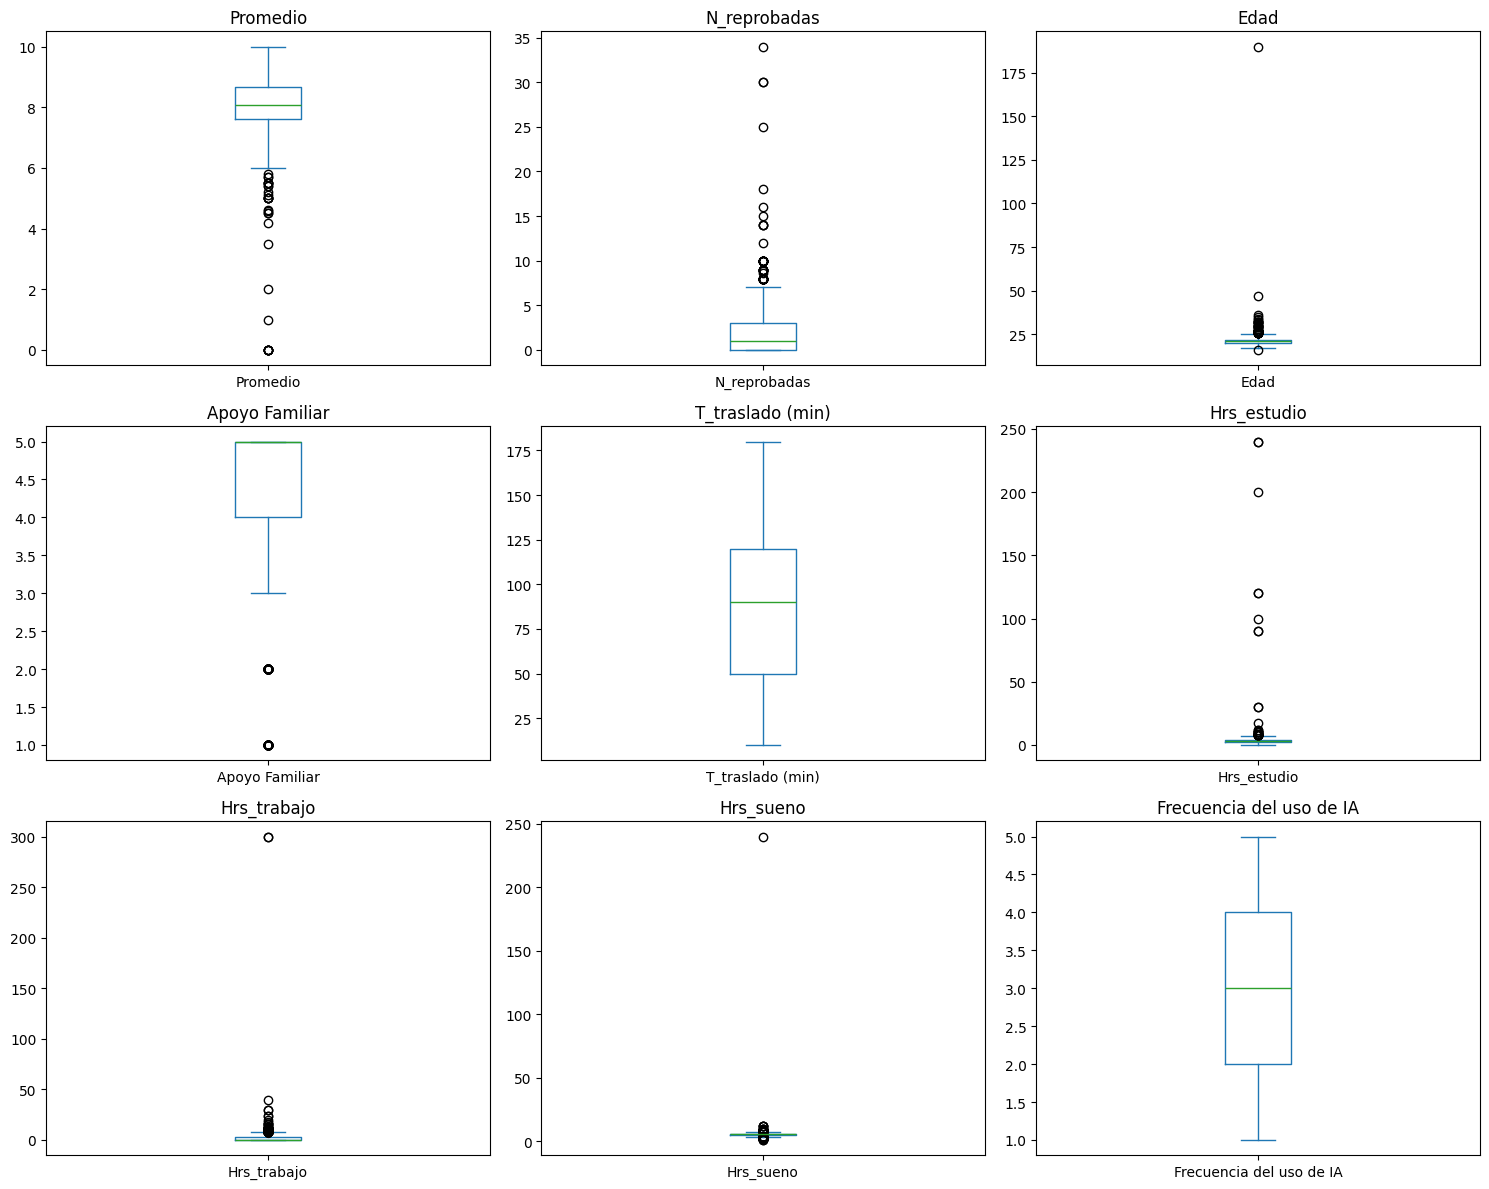

In [ ]:
# ===== GRÁFICOS BÁSICOS: DISTRIBUCIÓN DE LOS DATOS NUMÉRICOS =====
numeric_columns = df.select_dtypes(include=['number']).columns.values

n_cols = 3
n_rows = -(-len(numeric_columns) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

axes = axes.flatten()

# Boxplots
for i, column in enumerate(numeric_columns):
    df[column].plot(kind='box', ax=axes[i])
    axes[i].set_title(column)

for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

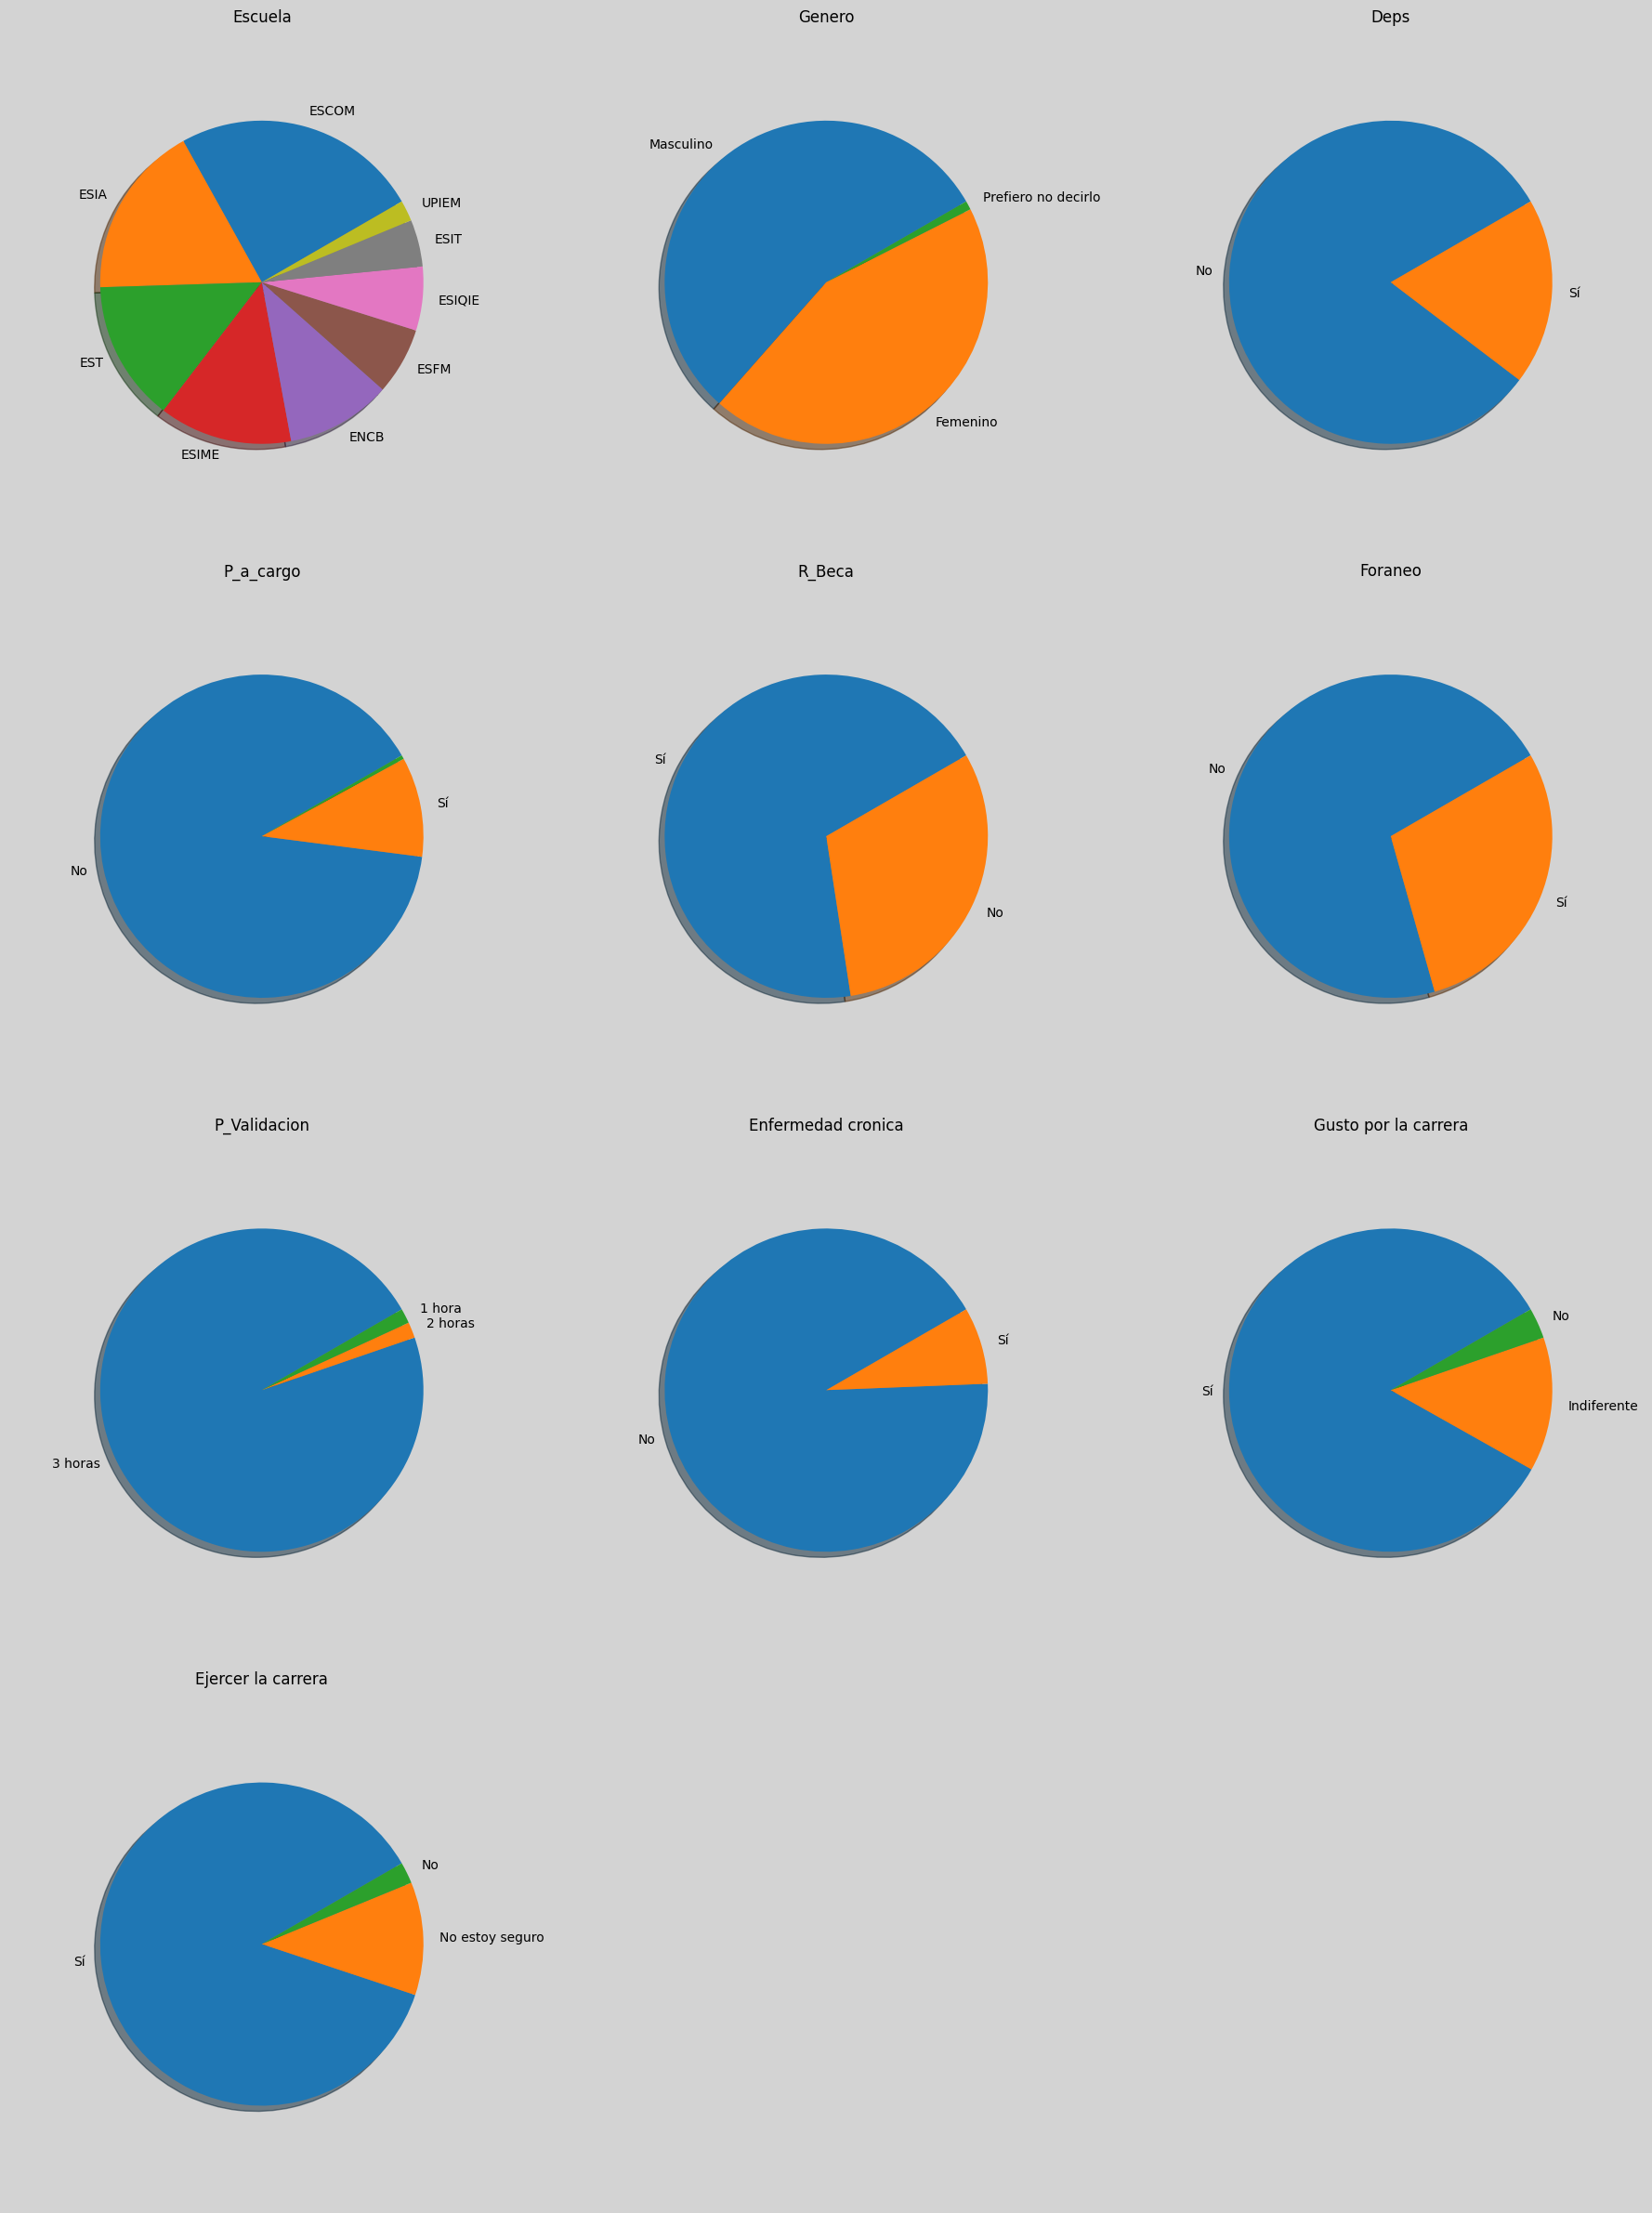

In [ ]:
# ===== GRÁFICOS BÁSICOS: PROPORCIONES DE LOS DATOS CATEGÓRICOS =====
categorical_columns = df.drop(columns=['Fecha', 'Correo']).select_dtypes(include='object').columns.values

n_cols = 3
n_rows = -(-len(categorical_columns) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6), facecolor='lightgrey')

axes = axes.flatten()

# Pasteles
for i, column in enumerate(categorical_columns):
    axes[i].pie(
        df[column].value_counts(),
        labels=df[column].value_counts().index,
        startangle=30,
        radius=0.8,
        shadow=True
    )
    axes[i].set_title(column)

for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

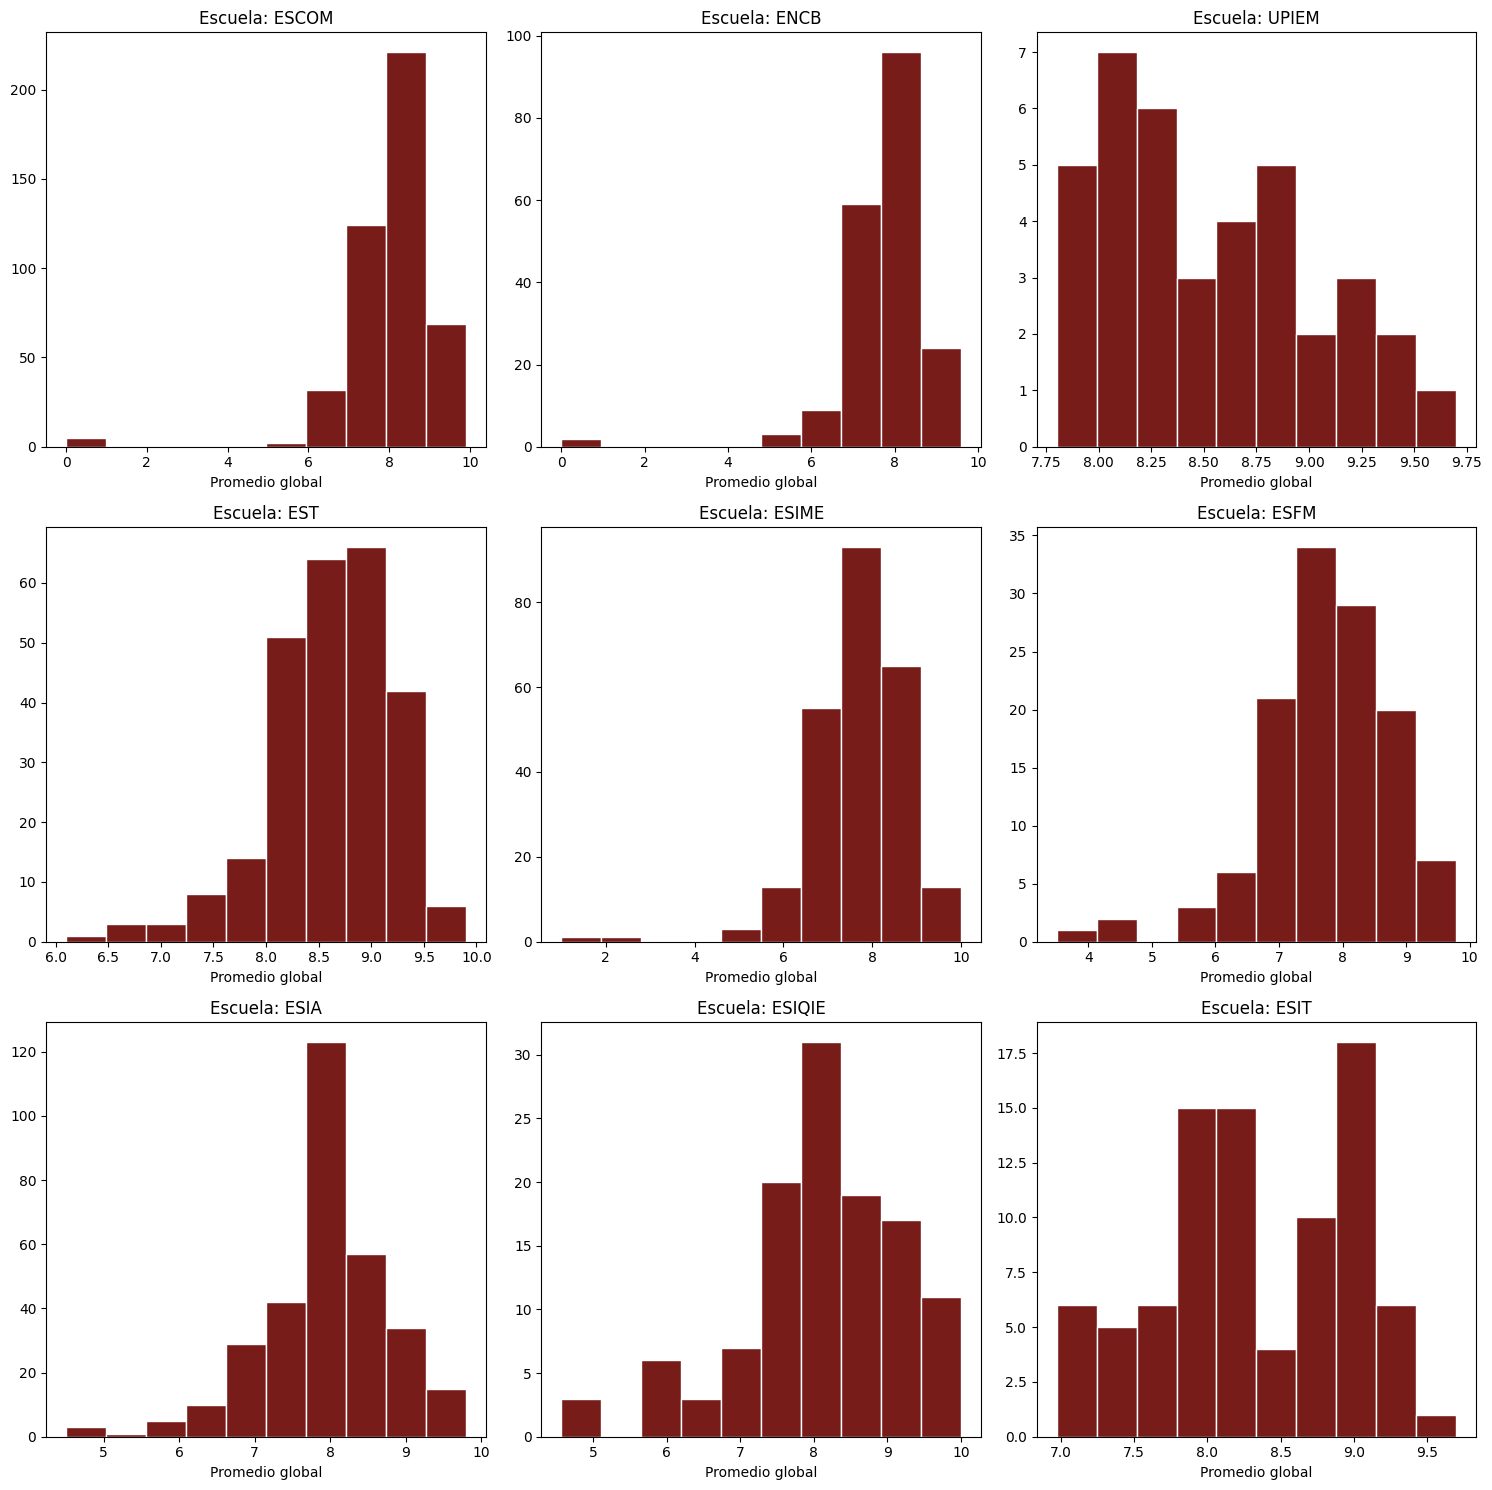

In [ ]:
# Variables únicas de 'Escuela'
escuelas = df['Escuela'].unique()

# Tamaño del grid
n_cols = 3  # Número de columnas en el grid
n_rows = -(-len(escuelas) // n_cols)  # Calcula el número de filas necesarias (redondeo hacia arriba)

# Crear la figura y subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Generar los histogramas
for i, escuela in enumerate(escuelas):
    escuela_data = df[df['Escuela'] == escuela]
    axes[i].hist(escuela_data['Promedio'], bins=10, color='#771C19', edgecolor='white')
    axes[i].set_title(f'Escuela: {escuela}')
    axes[i].set_xlabel("Promedio global")

# Quitar ejes vacíos si sobran
for j in range(len(escuelas), len(axes)):
    axes[j].axis('off')

# Ajustar los espacios entre subgráficos
plt.tight_layout()
plt.show()

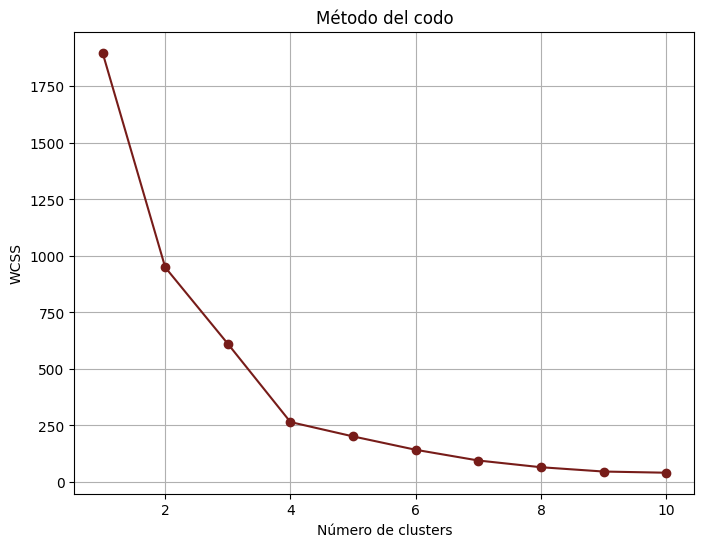

   Escuela  Cluster  Número de alumnos
0     ENCB        0                118
1     ENCB        1                 40
2     ENCB        2                 35
3    ESCOM        0                227
4    ESCOM        1                 64
5    ESCOM        2                162
6     ESFM        0                 57
7     ESFM        1                 30
8     ESFM        2                 36
9     ESIA        0                189
10    ESIA        1                 48
11    ESIA        2                 82
12   ESIME        0                126
13   ESIME        1                 66
14   ESIME        2                 52
15  ESIQIE        0                 54
16  ESIQIE        1                 17
17  ESIQIE        2                 46
18    ESIT        0                 44
19    ESIT        1                  3
20    ESIT        2                 39
21     EST        0                 81
22     EST        1                  7
23     EST        2                170
24   UPIEM        0      

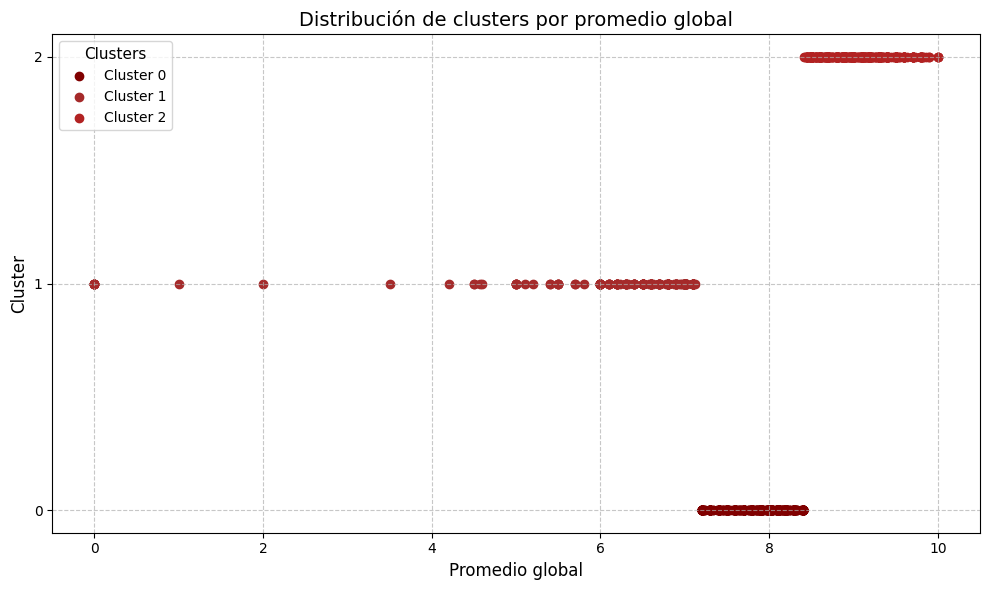

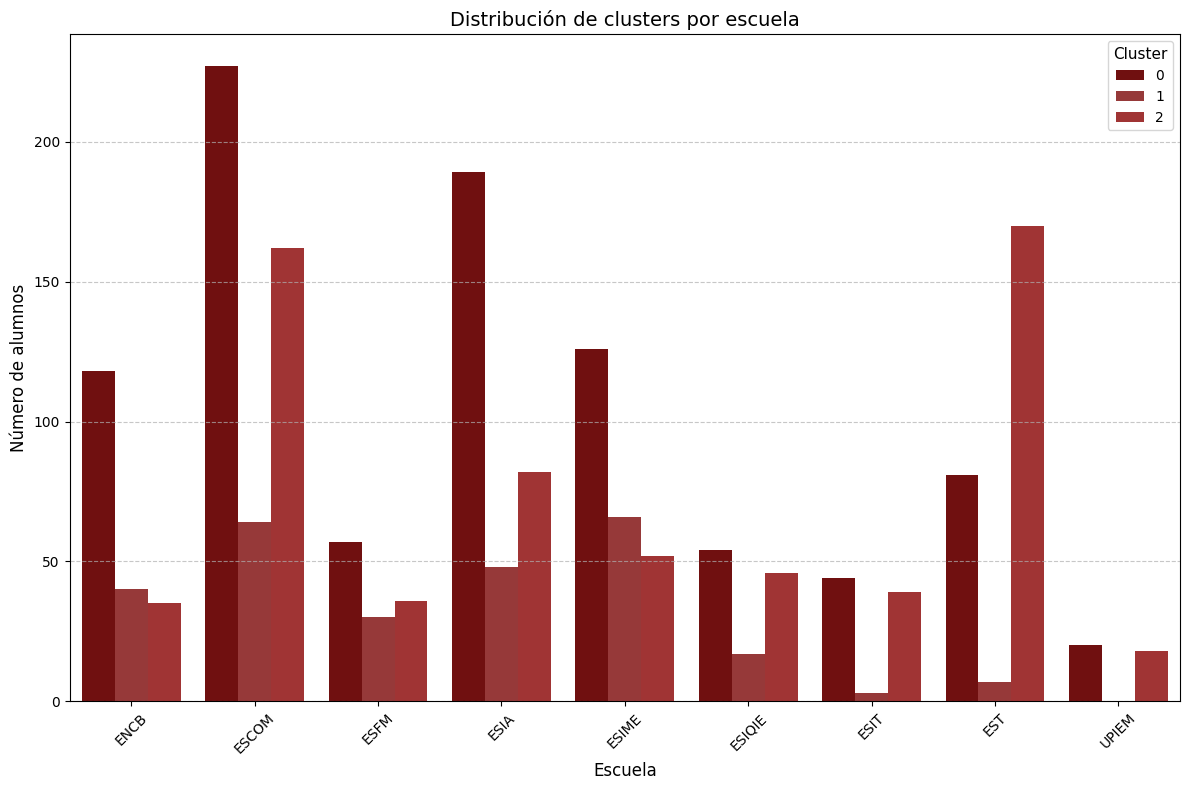

In [ ]:
# ===== CLUSTERS PARA AGRUPAR ESTUDIANTES EN FUNCIÓN DEL PROMEDIO =====
x = df['Promedio'].values.reshape(-1, 1)
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='#771C19')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=0)
data = df.copy()
data['Cluster'] = kmeans.fit_predict(x)

# ---------------------------------------------------------------------------------------------------------------

cluster_distribution = data.groupby(['Escuela', 'Cluster']).size().reset_index(name='Número de alumnos')
print(cluster_distribution)

# ---------------------------------------------------------------------------------------------------------------

# Gráfico de dispersión por clusters
guinda_palette = sns.color_palette(["#800000", "#A52A2A", "#B22222", "#CD5C5C", "#E9967A"])

# Crear la figura
plt.figure(figsize=(10, 6))

# Generar el gráfico de dispersión
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Promedio'],
        [cluster] * len(cluster_data),
        label=f'Cluster {cluster}',
        color=guinda_palette[cluster % len(guinda_palette)]  # Asignar color a cada cluster
    )

# Configuración del gráfico
plt.title('Distribución de clusters por promedio global', fontsize=14)
plt.xlabel('Promedio global', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.yticks(range(optimal_clusters), fontsize=10)
plt.legend(title='Clusters', fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Gráfico de barras agrupadas por escuela y cluster
guinda_palette = sns.color_palette(["#800000", "#A52A2A", "#B22222"])

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(
    data=cluster_distribution,
    x='Escuela',
    y='Número de alumnos',
    hue='Cluster',
    palette=guinda_palette  # Usar la paleta personalizada
)
plt.title('Distribución de clusters por escuela', fontsize=14)
plt.xlabel('Escuela', fontsize=12)
plt.ylabel('Número de alumnos', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

Cada cluster agrupó de la mejor manera a los estudiantes según su promedio, devolviendo los siguientes resultados
* Cluster 0: Representa a los estudiantes con promedios más altos (alrededor de 8 o más).
* Cluster 1: Agrupa a los estudiantes con promedios intermedios (entre 6 y 8).
* Cluster 2: Contiene a los estudiantes con promedios bajos (por debajo de 6)

Del procedimiento anterior, se pueden apreciar algunas situaciones interesantes:

ESCOM: Tiene una alta concentración de estudiantes en los clusters 0 y 1, indicando que la mayoría de sus alumnos tienen promedios intermedios o altos.

ESIME y EST: También destacan con distribuciones significativas en los clusters 0 y 1.

Cluster 2: Está presente en menor proporción en todas las escuelas, lo que significa que son pocos los estudiantes con promedios bajos.

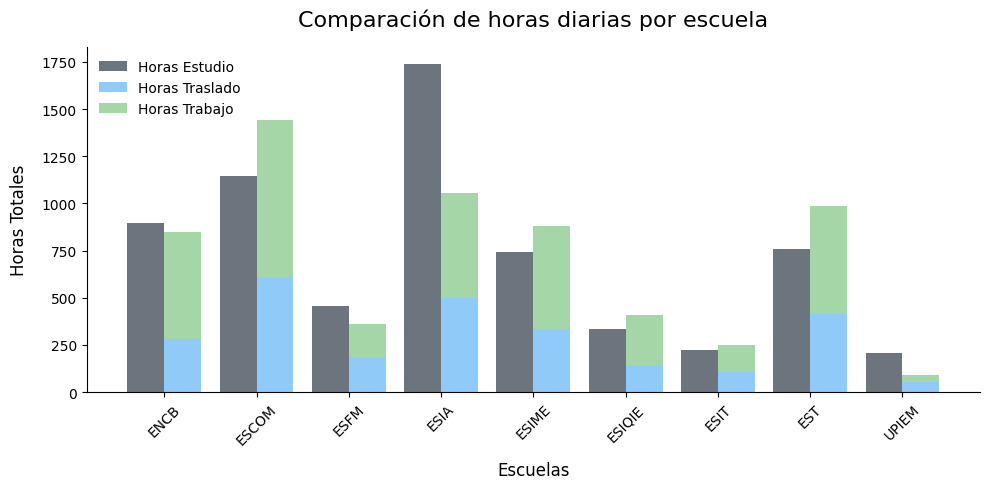

In [ ]:
# ===== GRÁFICO DE BARRAS COMPARATIVAS Y BARRAS APILADAS
# CAMBIAR NOMBRES DE VARIABLES A LOS NOMBRES ACTUALES

df['T_traslado (hrs)'] = df['T_traslado (min)'] / 60

# Agrupar los datos por escuela y calcular las sumas de horas
resumen = df.groupby('Escuela').agg({
    'Hrs_estudio': 'sum',
    'T_traslado (hrs)': 'sum',
    'Hrs_trabajo': 'sum'
}).reset_index()

# Renombrar columnas para mayor claridad
resumen.columns = ['Escuela', 'Total Horas Estudio / día', 'Total Horas Traslado / día', 'Total Horas Trabajo / día']
resumen

# ------------------------------------------------------------------------------------------------------------------------------

# Configurar datos
escuelas = resumen['Escuela']
x = np.arange(len(escuelas))
width = 0.4

# Crear figura
plt.figure(figsize=(10, 5))  # Tamaño más grande

# Barras de estudio
plt.bar(x - width/2, resumen['Total Horas Estudio / día'], width, label='Horas Estudio', color='#6c757d')  # Gris suave

# Barras apiladas para traslado y trabajo
plt.bar(x + width/2, resumen['Total Horas Traslado / día'], width, label='Horas Traslado', color='#90caf9')  # Azul claro
plt.bar(x + width/2, resumen['Total Horas Trabajo / día'], width, bottom=resumen['Total Horas Traslado / día'], label='Horas Trabajo', color='#a5d6a7')  # Verde claro

# Configurar etiquetas y diseño
plt.xlabel('Escuelas', fontsize=12, labelpad=10)
plt.ylabel('Horas Totales', fontsize=12, labelpad=10)
plt.title('Comparación de horas diarias por escuela', fontsize=16, pad=15)
plt.xticks(x, escuelas, rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, loc='upper left', frameon=False)

# Eliminar bordes superiores y derechos para diseño más limpio
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mejorar distribución y mostrar
plt.tight_layout()
plt.show()

De la gráfica, se observa que los alumnos de la ESCOM son los que más tiempo dedican a trabajar, mientras que los alumnos de la ESIA son los que más tiempo dedican a estudiar.

C:\Users\danie\AppData\Local\Temp\ipykernel_2268\4213448952.py:10: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  boxplot = sns.boxplot(


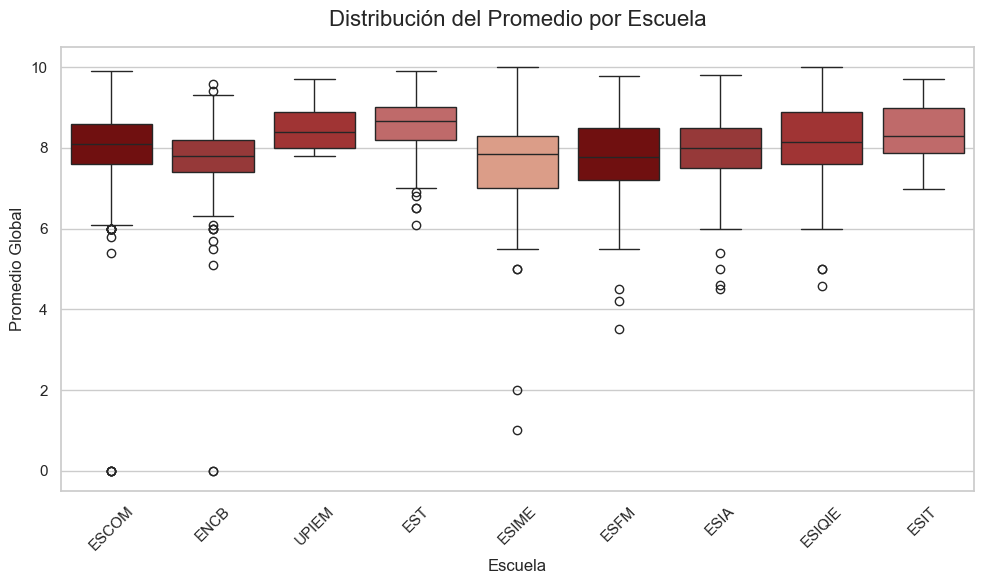

In [ ]:
# ===== GRÁFICOS DE CAJAS HRS. DE SUEÑO VS PROMEDIO =====

filtered_df = df[df['Hrs_estudio'] <= 12]

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de box plots
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    data=filtered_df,  # Usar el dataframe filtrado
    x='Escuela',       # Categorías en el eje x
    y='Promedio',      # Variable numérica en el eje y
    hue='Escuela',
    palette= sns.color_palette(["#800000", "#A52A2A", "#B22222", "#CD5C5C", "#E9967A"])
)

# Configurar etiquetas y título
plt.title('Distribución del Promedio por Escuela', fontsize=16, pad=15)
plt.xlabel('Escuela', fontsize=12)
plt.ylabel('Promedio Global', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas escuelas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


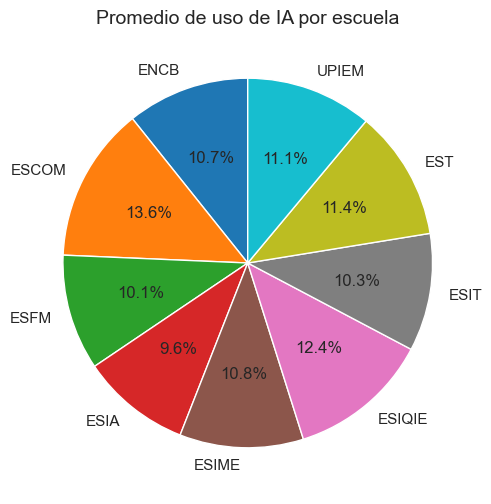

In [ ]:
# ===== GRÁFICO DE PASTEL: USO DE IA POR ESCUELA.

uso_IA = df.groupby('Escuela')['Frecuencia del uso de IA'].mean()

#Gráfico
plt.figure(figsize=(10,6))
uso_IA.plot(kind='pie', autopct = '%1.1f%%', startangle=90, cmap='tab10')
plt.title('Promedio de uso de IA por escuela', fontsize = 14)
plt.ylabel('')
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_2268\12197087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


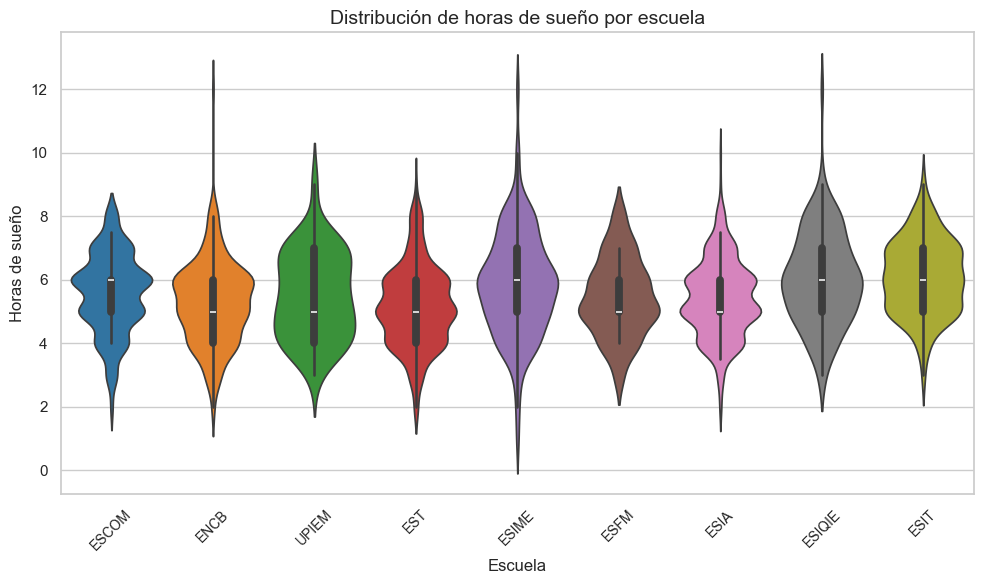

In [ ]:
#===== GRÁFICOS DE VIOLÍN ESCUELA VS HRS. DE SUEÑO

filtro = df[(df['Hrs_sueno'] <= 12)]
#Gráfico
plt.figure(figsize=(10, 6))
sns.violinplot(
    x = 'Escuela',
    y = 'Hrs_sueno',
    data = filtro,
    palette='tab10'
)
plt.title('Distribución de horas de sueño por escuela', fontsize = 14)
plt.xlabel('Escuela', fontsize = 12)
plt.ylabel('Horas de sueño', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)
plt.tight_layout()
plt.show()

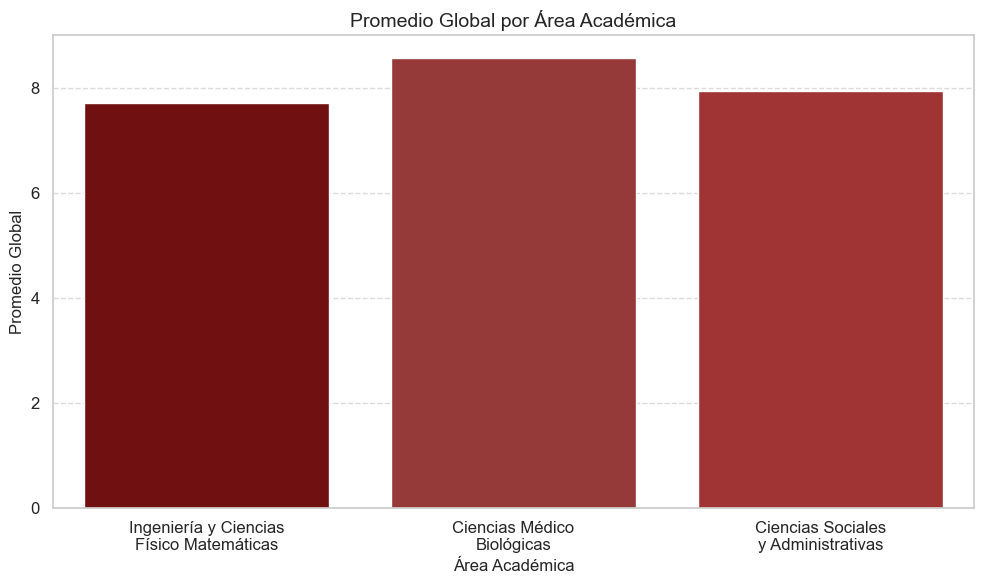

In [ ]:
# ===== GRÁFICO DE BARRAS ÁREA ACADÉMICA VS PROMEDIO

# Agrupar las escuelas en áreas académicas
areas = {
    "Ingeniería y Ciencias Físico Matemáticas": ["ESCOM", "ESIA", "ESIME", "ESIQIE", "ESFM", "ESIT"],
    "Ciencias Médico Biológicas": ["ENCB"],
    "Ciencias Sociales y Administrativas": ["EST", "UPIEM"]
}

etiquetas = ['Ingeniería y Ciencias\nFísico Matemáticas',
             'Ciencias Médico\nBiológicas',
             'Ciencias Sociales\ny Administrativas']

# Asignar el área académica a cada registro
def asignar_area(escuela):
    for area, escuelas in areas.items():
        if escuela in escuelas:
            return area
    return "Otras Áreas"

df['Área Académica'] = df['Escuela'].apply(asignar_area)

# Calcular el promedio por área académica
prom_area = df.groupby('Área Académica')['Promedio'].mean().reset_index()

# Crear la gráfica de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Área Académica',
    y='Promedio',
    data=prom_area,
    palette= sns.color_palette(["#800000", "#A52A2A", "#B22222"]),
    hue='Área Académica'
)

# Configurar etiquetas y título
plt.title('Promedio Global por Área Académica', fontsize=14)
plt.xlabel('Área Académica', fontsize=12)
plt.ylabel('Promedio Global', fontsize=12)
plt.xticks(ticks=range(len(etiquetas)), labels=etiquetas, rotation=0, fontsize=12, ha='center')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


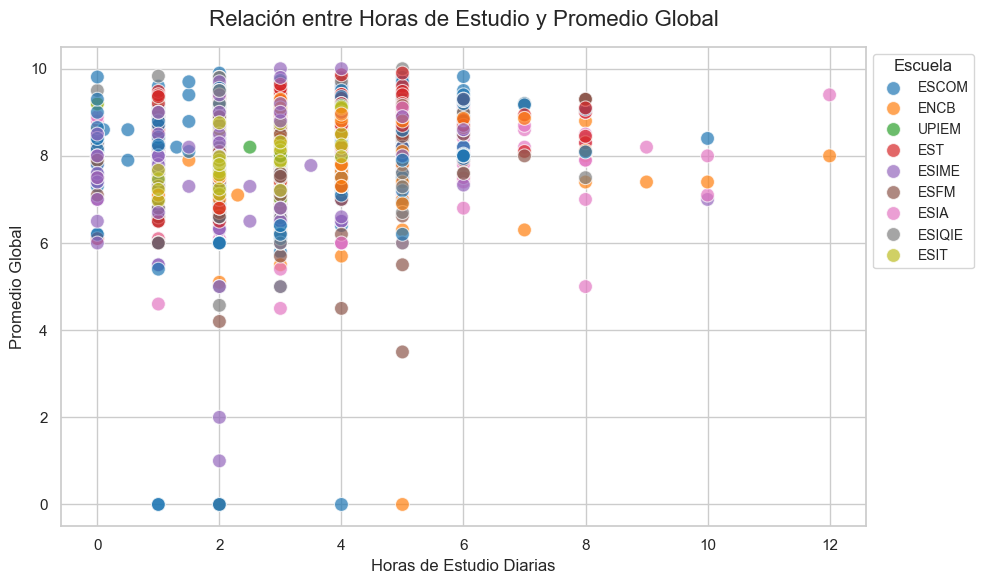

In [ ]:
# ===== GRÁFICO DE DISPERSIÓN HRS. ESTUDIO VS PROMEDIO POR ESCUELA
#CAMBIAR LOS NOMBRES DE VARIABLES A LOS NOMBRES ACTUALES

# Establecer un límite razonable para las horas de estudio
limite_horas_estudio = 12  # Puedes ajustarlo si es necesario

# Filtrar los datos para eliminar outliers
df_filtrado = df[df['Hrs_estudio'] <= limite_horas_estudio]

# Verificar los datos después del filtrado
df_filtrado.describe()

# --------------------------------------------------------------------------------------------------------------------

# Crear el gráfico de dispersión con datos filtrados
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_filtrado,
    x='Hrs_estudio',
    y='Promedio',
    hue='Escuela',  # Diferenciar por escuela
    palette='tab10',  # Colores distintivos para cada escuela
    alpha=0.7,  # Transparencia
    s=100  # Tamaño de los puntos
)

# Configurar etiquetas y diseño
plt.title('Relación entre Horas de Estudio y Promedio Global', fontsize=16, pad=15)
plt.xlabel('Horas de Estudio Diarias', fontsize=12)
plt.ylabel('Promedio Global', fontsize=12)
plt.legend(title='Escuela', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Mostrar el gráfico
plt.show()

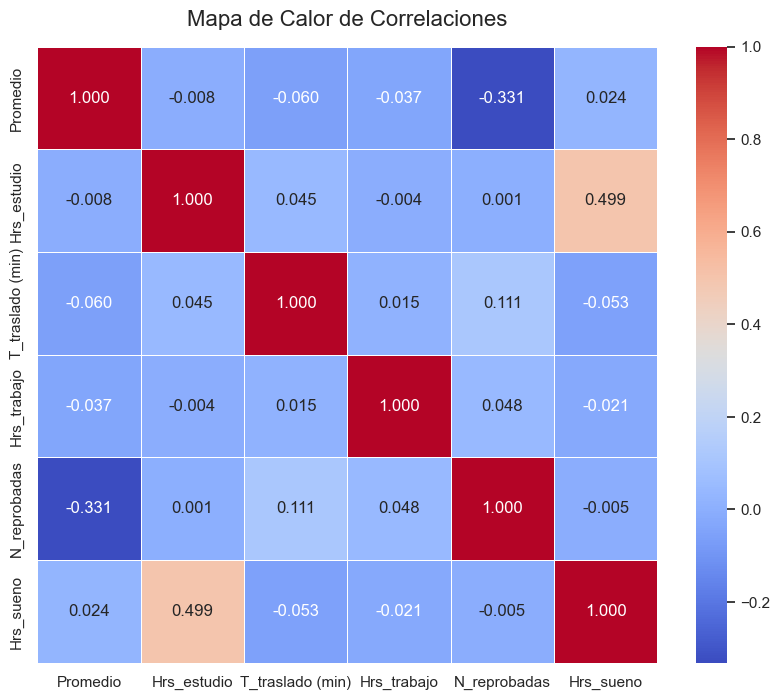

In [ ]:
# MAPA DE CALOR DE CORRELACIÓN LINEAL
# MEJORAR LA SELECCIÓN DE VARIABLES NUMÉRICAS Y CAMBIAR NOMBRES DE VARIABLES A LOS NOMBRES ACTUALES

# Seleccionar las columnas numéricas relevantes
datos_numericos = df[[
    'Promedio',
    'Hrs_estudio',
    'T_traslado (min)',
    'Hrs_trabajo',
    'N_reprobadas',
    'Hrs_sueno'
]]

# Renombrar columnas para simplificar
#datos_numericos.columns = [
#    'Promedio',
#    'Hrs_estudio',
#    'T_traslado',
#    'Hrs_trabajo',
#    'N_Reprobadas',
#    'Hrs_sueno'
#]

# Calcular la matriz de correlación
correlation_matrix = datos_numericos.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Mostrar valores en las celdas
    cmap='coolwarm',  # Paleta de colores
    fmt='.3f',  # Formato de los números
    linewidths=0.5  # Líneas entre celdas
)

# Configurar el título
plt.title('Mapa de Calor de Correlaciones', fontsize=16, pad=15)

# Mostrar el gráfico
plt.show()

Identificamos que existe cierta correlación positiva entre variables como las horas de estudio y horas de sueño. Por otro lado, también se aprecia cierta correlación negativa entre el promedio y la cantidad de materias reprobadas, este comportamiento tiene sentido lógico en un contexto académico, dado que más materias reprobadas indican un menor desempeño, lo cual se refleja en un promedio global más bajo.

Estas dos correlaciones caen en un rango moderado de correlación, valdría la pena explorarlas más a fondo, considerar otras variables,

In [ ]:
df.head()

,Fecha,Correo,Escuela,Promedio,N_reprobadas,Edad,Genero,Deps,P_a_cargo,Apoyo Familiar,...,Hrs_estudio,P_Validacion,Hrs_trabajo,Enfermedad cronica,Gusto por la carrera,Ejercer la carrera,Hrs_sueno,Frecuencia del uso de IA,T_traslado (hrs),Área Académica
0,28/11/2024 11:44:10,ax3l.riv@gmail.com,ESCOM,8.4,0.0,20,Masculino,No,No,5,...,3.0,3 horas,0.0,No,Sí,Sí,6.0,4,0.250000,Ingeniería y Ciencias Físico Matemáticas
1,28/11/2024 12:18:18,bejarjesus032@gmail.com,ESCOM,6.0,1.0,19,Masculino,Sí,No,5,...,1.0,3 horas,0.0,No,Sí,Sí,7.0,4,1.000000,Ingeniería y Ciencias Físico Matemáticas
2,28/11/2024 12:18:44,concepciondaniel90@gmail.com,ESCOM,7.7,0.0,19,Masculino,No,No,5,...,1.0,3 horas,5.0,No,Sí,Sí,5.0,4,1.000000,Ingeniería y Ciencias Físico Matemáticas
3,28/11/2024 12:18:57,hernandezakira33@gmail.com,ESCOM,6.4,1.0,19,Masculino,No,No,5,...,3.0,3 horas,1.0,No,Indiferente,Sí,5.0,1,1.000000,Ingeniería y Ciencias Físico Matemáticas
4,28/11/2024 12:19:02,betohacker033@gmail.com,ESCOM,6.5,4.0,21,Masculino,No,No,5,...,4.0,3 horas,0.0,No,Sí,Sí,6.0,3,0.666667,Ingeniería y Ciencias Físico Matemáticas


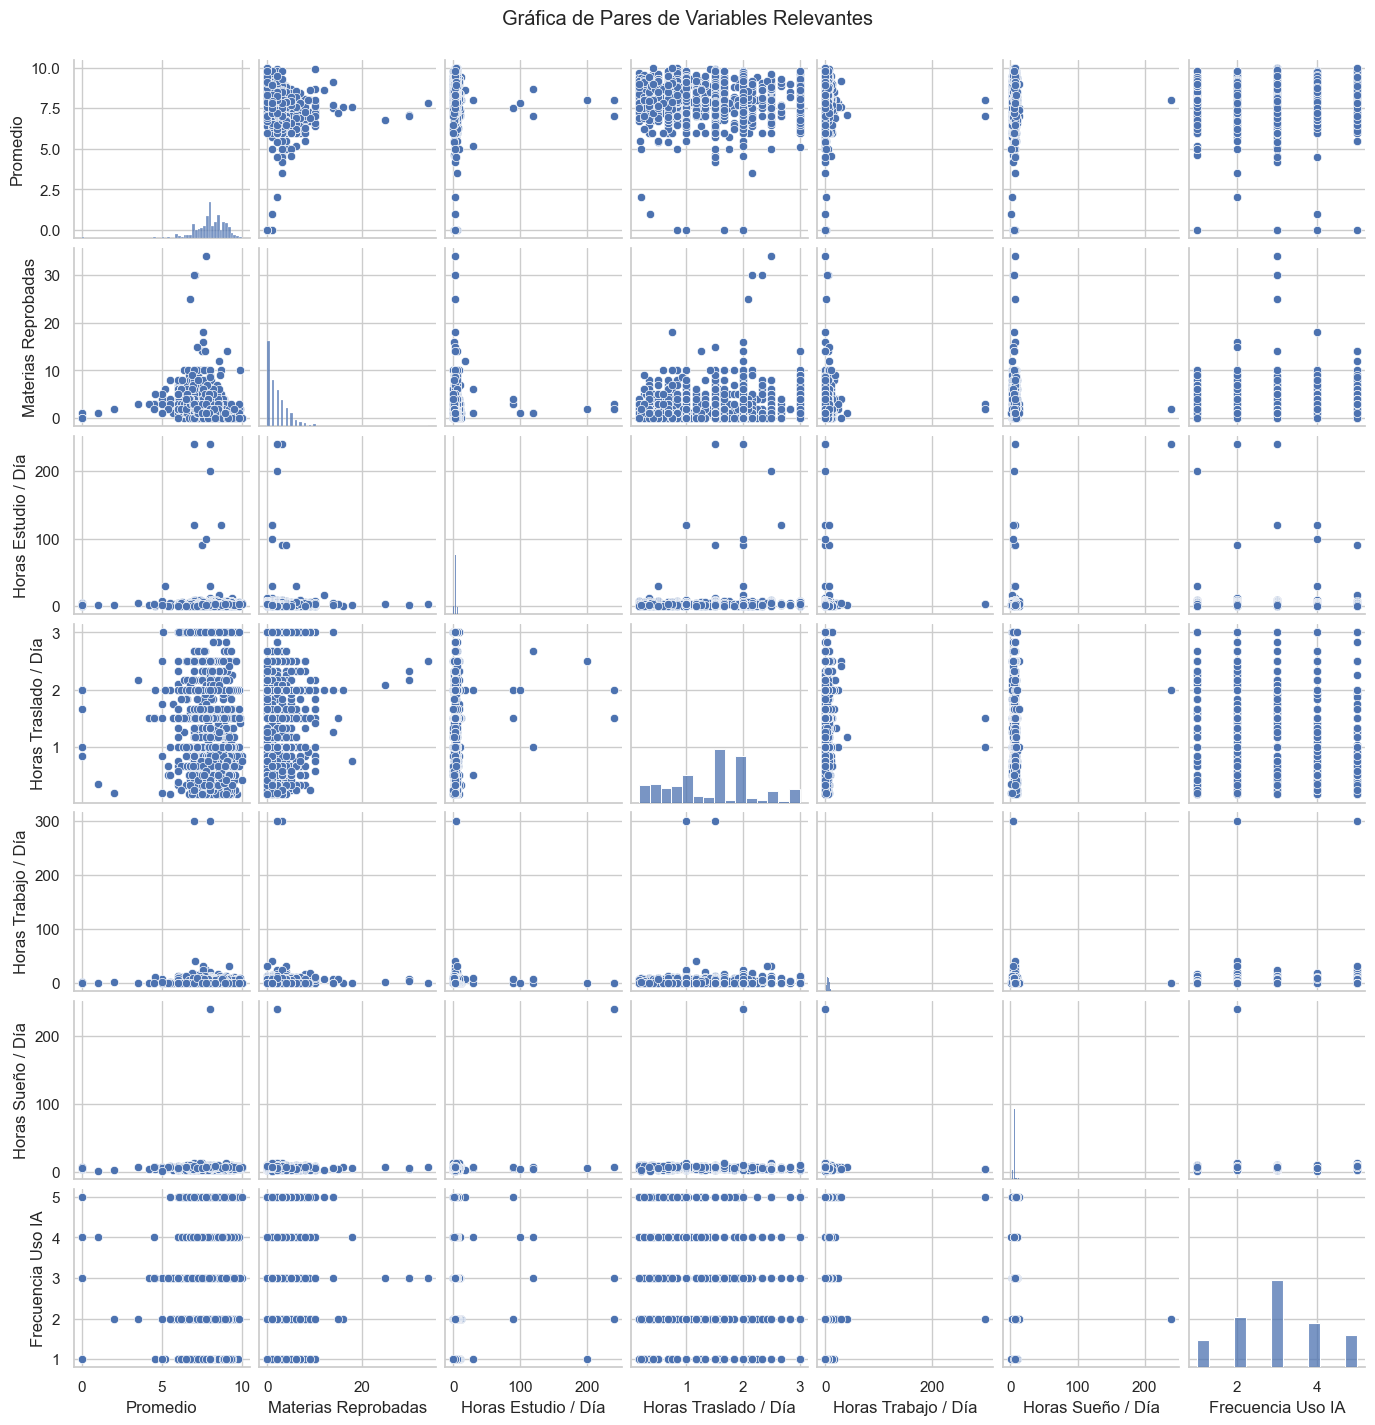

In [ ]:
# GRÁFICO DE DISPERSIÓN A PARES

# Seleccionar columnas relevantes
columns_to_plot = [
    'Promedio',
    'N_reprobadas',
    'Hrs_estudio',
    'T_traslado (hrs)',
    "Hrs_trabajo",
    'Hrs_sueno',
    'Frecuencia del uso de IA'
]

# Filtrar las columnas relevantes
df_filtered = df[columns_to_plot]

# Renombrar columnas para mayor claridad en la gráfica (opcional)
df_filtered.columns = [
    'Promedio',
    'Materias Reprobadas',
    'Horas Estudio / Día',
    'Horas Traslado / Día',
    'Horas Trabajo / Día',
    'Horas Sueño / Día',
    'Frecuencia Uso IA'
]

# Generar la gráfica de pares
sns.pairplot(df_filtered, height=2)  # Ajusta el tamaño de cada subgráfico
plt.suptitle('Gráfica de Pares de Variables Relevantes', y=1.02)
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_2268\1660148444.py:9: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df_filtrado, x='Escuela', y='Promedio', palette=guinda_palette, hue='Escuela')


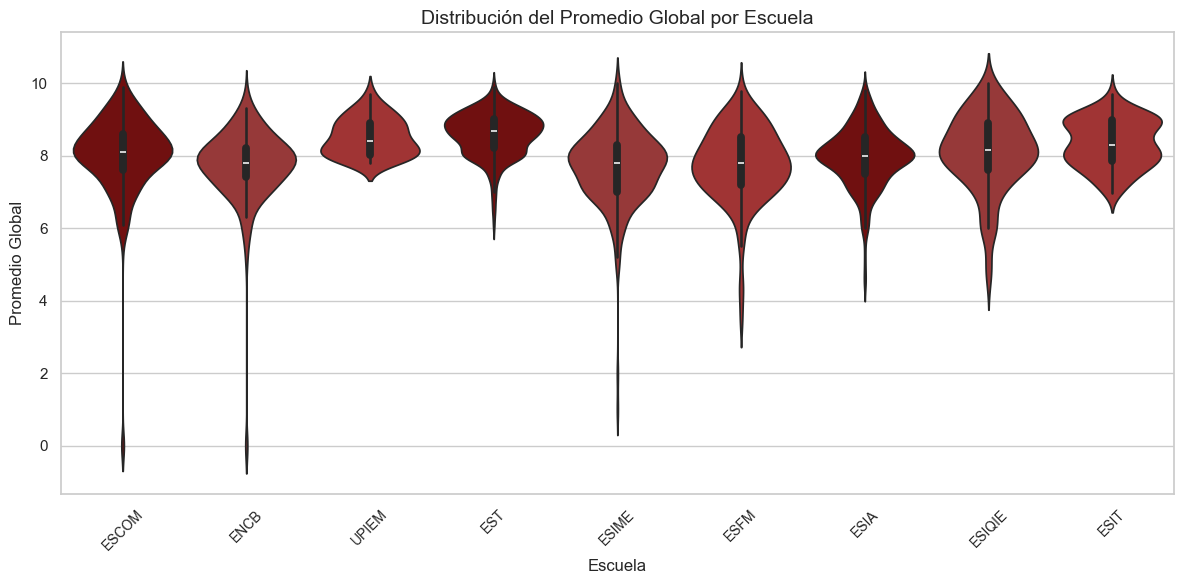

In [ ]:
## ===== GRÁFICOS DE VIOLÍN PROMEDIO POR ESCUELA =====

# Filtrar el DataFrame para incluir solo las escuelas relevantes
escuelas_relevantes = ["ESCOM", "ESIA", "EST", "ESIME", "ENCB", "ESFM", "ESIQIE", "ESIT", "UPIEM"]
df_filtrado = df[df['Escuela'].isin(escuelas_relevantes)]

# Crear el gráfico de violín para el promedio global por escuela
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_filtrado, x='Escuela', y='Promedio', palette=guinda_palette, hue='Escuela')

# Configuración de la gráfica
plt.title('Distribución del Promedio Global por Escuela', fontsize=14)
plt.xlabel('Escuela', fontsize=12)
plt.ylabel('Promedio Global', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Conclusiones - gráfica de violín en promedios por escuela
1. Diferencias entre escuelas
- En top 3 se estarian EST, ESIT y UPIEM porque tienen una distribución más concentrada en los promedios altos (8-10), lo que sugiere un mejor desempeño académico en general. Además están más compactas, eso quiere decir que sus estudiantes tienen promedios dentro de un rango más definido.
- En la ESFM, ESIQIE y ESIME se observa una mayor dispersión de los promedios hacia valores bajos, lo que refleja una mayor diversidad en el rendimiento académico de sus estudiantes.
2. Outliers (valores atípicos)
- Se observan hacia promedios extremadamente bajos en ESCOM y ENCB.


In [ ]:
df.columns.values

array(['Fecha', 'Correo', 'Escuela', 'Promedio', 'N_reprobadas', 'Edad',
       'Genero', 'Deps', 'P_a_cargo', 'Apoyo Familiar', 'R_Beca',
       'Foraneo', 'T_traslado (min)', 'Hrs_estudio', 'P_Validacion',
       'Hrs_trabajo', 'Enfermedad cronica', 'Gusto por la carrera',
       'Ejercer la carrera', 'Hrs_sueno', 'Frecuencia del uso de IA',
       'T_traslado (hrs)', 'Área Académica'], dtype=object)

---

# MODIFY

In [ ]:
'''
=== ELIMINACIÓN DE RESPUESTAS DUPLICADAS ==

Descripcion: Funcion que identifica los valores duplicados en una columna de correos del df
y posterior a eso, elimina la respuesta de la segunda incidencia de un mismo correo.

'''
def eliminar_duplicados(df, columna):
    duplicados = 0
    registros_duplicados = []
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            if df[columna].iloc[i] == df[columna].iloc[j]: #Va comparando un elemento con el resto de registros
                print(f"Correo {df[columna].iloc[i]} duplicado en filas {i} y {j}")   #Muestra en que registro hay correos duplicados
                if j not in registros_duplicados:  #Si un indice no esta en la lista lo agrega
                    duplicados = duplicados + 1 #Registramos la cantidad de duplicados
                    registros_duplicados.append(j) #Agrega el resgistro duplicado
    if duplicados > 0: #Si hay registros guardado estos los elimina
        df = df.drop(index = registros_duplicados).reset_index(drop=True)  #Elimina y reacomoda los indices
        print(f"Se eliminaron {duplicados} duplicados.")
    else:
        print('El DataFrame está limpio, sin duplicados.')
    return df #Devuelve el dataframe

df = eliminar_duplicados(df, 'Correo')

Correo alegaminstaca68@gmail.com duplicado en filas 10 y 1569


In [ ]:
'''
=== FILTRADO DE REGISTROS VÁLIDOS POR PREGUNTA DE VALIDACIÓN ===

Descripción: Función para filtrar todas las respuestas diferentes a '3 horas' en la pregunta de validación,
posteriormente se elimina la columa P_validacion porque ya no tiene sentido tenerla.

'''
def Filtrado_Pvalidacion(df):
    registros_iniciales = len(df)
    df = df[df['P_Validacion'] == '3 horas']
    registros_finales = len(df)
    df = df.drop(columns=['P_Validacion'])

    informe = (
        f"Registros iniciales: {registros_iniciales}, "
        f"Registros eliminados: {registros_iniciales - registros_finales}, "
        f"Registros finales: {registros_finales}"
    )

    return df, informe

df, informe = Filtrado_Pvalidacion(df)
print(informe)

Registros iniciales: 1817, Registros eliminados: 56, Registros finales: 1761


In [ ]:
'''
=== TRATAMIENTO DE LA COLUMNA PROMEDIO, HORAS DE SUEÑO, EDAD Y HORAS DE ESTUDIO POR IQR  ===

Descripción: Función para ajustar los valores extremos dentro de las columnas deseadas por el método iqr.

'''
def ajustar_iqr_con_informe(df, columnas):

    informe = {}

    for columna in columnas:
        # Calcular Q1, Q3 e IQR
        q1 = df[columna].quantile(0.25)
        q3 = df[columna].quantile(0.75)
        iqr = q3 - q1

        # Calcular límites superior e inferior
        limite_inferior = q1 - (1.5 * iqr)
        limite_superior = q3 + (1.5 * iqr)

        # Contar valores extremos
        valores_bajo_limite = (df[columna] < limite_inferior).sum()
        valores_sobre_limite = (df[columna] > limite_superior).sum()
        total_extremos = valores_bajo_limite + valores_sobre_limite

        # Ajustar los valores extremos
        df[columna] = np.where(df[columna] < limite_inferior, limite_inferior, df[columna])
        df[columna] = np.where(df[columna] > limite_superior, limite_superior, df[columna])

        # Agregar información al informe
        informe[columna] = {
            "limite_inferior": limite_inferior,
            "limite_superior": limite_superior,
            "valores_bajo_limite": valores_bajo_limite,
            "valores_sobre_limite": valores_sobre_limite,
            "total_valores_extremos": total_extremos
        }

    return df, informe


# Aplicar ajuste y generar el informe
columnas_a_ajustar = ["Promedio", "Hrs_sueno", "Hrs_estudio", "Edad"]
df_ajustado, informe = ajustar_iqr_con_informe(df, columnas_a_ajustar)

# Imprimir el informe
print("Informe de límites y ajustes:")
for columna, detalles in informe.items():
    print(f"\nColumna: {columna}")
    for clave, valor in detalles.items():
        print(f"  {clave}: {valor}")



Informe de límites y ajustes:

Columna: Promedio
  limite_inferior: 5.95
  limite_superior: 10.349999999999998
  valores_bajo_limite: 28
  valores_sobre_limite: 0
  total_valores_extremos: 28

Columna: Hrs_sueno
  limite_inferior: 3.5
  limite_superior: 7.5
  valores_bajo_limite: 77
  valores_sobre_limite: 128
  total_valores_extremos: 205

Columna: Hrs_estudio
  limite_inferior: -1.0
  limite_superior: 7.0
  valores_bajo_limite: 0
  valores_sobre_limite: 41
  total_valores_extremos: 41

Columna: Edad
  limite_inferior: 17.0
  limite_superior: 25.0
  valores_bajo_limite: 0
  valores_sobre_limite: 45
  total_valores_extremos: 45


In [ ]:
"""
=== TRATAMIENTO DE LA COLUMNA DE MATERIAS REPROBADAS ===

Descripción: Función que identifica valores extremos en la columna de materias reprobadas
y los corrige con la media.

"""

def N_reprobadas_extremos_con_media(df, N_reprobadas):

    media = df[N_reprobadas].mean()

    #Calculo de los limites de la columna de N_reprobadas usando los cuartiles y el IQR
    Q1 = df[N_reprobadas].quantile(0.25)
    Q3 = df[N_reprobadas].quantile(0.75)
    IQR = Q3 - Q1 #El IQR incluye el 50% de los datos centrales

    #Limites para valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Encontrar los valores atípicos
    atipicos = df[(df[N_reprobadas] < limite_inferior) | (df[N_reprobadas] > limite_superior)][N_reprobadas]

    df.loc[atipicos.index, N_reprobadas] = media


N_reprobadas_extremos_con_media(df, 'N_reprobadas')

In [ ]:
"""
=== TRATAMIENTO DE LA COLUMNA DE HORAS DE SUEÑO ===

Descripción: Función que identifica valores extremos en la columna de Horas de sueño (Hrs_sueño)
y los reemplace por la media de la columna.

"""

def Hrs_sueno_extremos_con_ajustes(df, Hrs_sueno):
    # Calcular los cuartiles y el IQR
    Q1 = df[Hrs_sueno].quantile(0.25)
    Q3 = df[Hrs_sueno].quantile(0.75)
    IQR = Q3 - Q1

    # Limites para valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Ajustes de valores extremos
    def ajustar_valores(valor):
        if valor < limite_inferior:
            return limite_inferior  # Ajustar al límite inferior si es menor
        elif limite_inferior <= valor <= 10:
            return valor  # No hacer ajustes si está dentro del rango permitido
        elif valor > 10:
            return 10  # Ajustar a 10 si es mayor a 10

    # Aplicar el ajuste a las horas de sueño
    df[Hrs_sueno] = df[Hrs_sueno].apply(ajustar_valores)

    return df

#Aplicar
df = Hrs_sueno_extremos_con_ajustes(df, 'Hrs_sueno')



In [ ]:
"""
==TRATAMIENTO DE LA COLUMNA DE HORAS DE TRABAJO ===

Descripción: Funcion que procesa la columna de horas de trabajo, corrigiendo valores inconsistentes.

"""
def procesar_horas_trabajo(df, columna, metodo_correccion='media', rango_aceptable=(0, 12)):
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

    # Calcular la media o mediana de los valores dentro del rango aceptable
    valores_validos = df[columna].dropna()
    valores_validos = valores_validos[(valores_validos >= rango_aceptable[0]) & (valores_validos <= rango_aceptable[1])]

    if metodo_correccion == 'mediana':
        valor_correccion = valores_validos.median()
    elif metodo_correccion == 'media':
        valor_correccion = valores_validos.mean()
    else:
        raise ValueError("El método de corrección debe ser 'mediana' o 'media'.")

    # Identificar valores inconsistentes
    valores_inconsistentes = ~df[columna].between(rango_aceptable[0], rango_aceptable[1]) | df[columna].isna()

    # Reemplazar valores inconsistentes con el valor de corrección
    df.loc[valores_inconsistentes, columna] = valor_correccion

    return df

# Procesar la columna 'HorasTrabajo' utilizando la mediana para la corrección
df = procesar_horas_trabajo(df, columna='Hrs_trabajo', metodo_correccion='media')

C:\Users\danie\AppData\Local\Temp\ipykernel_11840\1827578323.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5139125496876775' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[valores_inconsistentes, columna] = valor_correccion


In [ ]:
"""
    === TRATAMIENTO DE LA COLUMNA DE TIEMPO DE TRASLADO ===

    Descripción: Función que procesa la columna 'T_traslado (min)', reemplazando valores fuera del rango aceptable por la media
    de los valores válidos dentro del rango especificado.

"""

def procesar_traslado_minutos(df, columna, metodo_correccion='media', rango_aceptable=(0, 180)):
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

    # Filtrar los valores dentro del rango aceptable
    valores_validos = df[columna].dropna()
    valores_validos = valores_validos[(valores_validos >= rango_aceptable[0]) & (valores_validos <= rango_aceptable[1])]

    # Calcular la corrección (media o mediana)
    if metodo_correccion == 'mediana':
        valor_correccion = valores_validos.median()
    elif metodo_correccion == 'media':
        valor_correccion = valores_validos.mean()
    else:
        raise ValueError("El método de corrección debe ser 'media' o 'mediana'.")

    # Identificar valores fuera de rango o NaN
    valores_inconsistentes = ~df[columna].between(rango_aceptable[0], rango_aceptable[1]) | df[columna].isna()

    # Reemplazar valores fuera de rango con la media/mediana
    df.loc[valores_inconsistentes, columna] = valor_correccion

    return df

# Procesar la columna 'T_traslado (min)' utilizando la media para la corrección
df = procesar_traslado_minutos(df, columna='T_traslado (min)', metodo_correccion='media')


In [ ]:
"""
=== CONVERSIÓN A ENTEROS EN LAS COLUMNAS CORRESPONDIENTES ===

Descripcion: la funcion convert_to_int convierte todas las columnas numericas a int, con excepcion del
Promedio que se queda en float.

"""

# Funcion para convertir todas las columnas numericas a entero a excepcion del Promedio.
def convert_to_int(df):
    # Seleccionar columnas numéricas
    numeric_columns = df.select_dtypes(include=['number']).columns
    # Nueva lista de las columnas numéricas quitando "promedio"
    numeric_columns_sin_promedio = [col for col in numeric_columns if col != 'Promedio']


    for col in numeric_columns_sin_promedio:
        # Verifica si el tipo de dato no es int64
        if df[col].dtype != 'int64':
            # Imprime las columnas que cambio a int
            print(f"Convirtiendo columna '{col}' de {df[col].dtype} a int")
            # Rellena NaN con 0 y convierte a int
            df[col] = df[col].fillna(0).astype(int)
    return df[numeric_columns_sin_promedio]

# Aplica la función y actualiza df
convert_to_int(df)

Convirtiendo columna 'Deps' de float64 a int
Convirtiendo columna 'P_a_cargo' de float64 a int
Convirtiendo columna 'Hrs_trabajo' de float64 a int
Convirtiendo columna 'Hrs_sueno' de float64 a int


,N_reprobadas,Edad,Deps,P_a_cargo,Apoyo Familiar,T_traslado (min),Hrs_estudio,Hrs_trabajo,Hrs_sueno,Frecuencia del uso de IA,T_traslado (hrs)
0,0,20,0,0,5,15,3,0,6,4,0
1,1,19,0,0,5,60,1,0,7,4,1
2,0,19,0,0,5,60,1,5,5,4,1
3,1,19,0,0,5,60,3,1,5,1,1
4,4,21,0,0,5,40,4,0,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...
1812,0,22,0,0,5,60,4,0,7,2,1
1813,1,22,0,0,4,40,4,0,6,2,0
1814,1,23,0,0,4,20,2,0,6,3,0
1815,0,20,0,0,3,60,3,0,7,2,1


In [ ]:
"""
=== ELIMINACIÓN DE COLUMNAS NO NECESARIAS ===

Descripcion: Función para eliminar las columnas Fecha y Correo para el df que será utilizado en Model.

Parametros:
          df: el DataFrame que contiene los datos y sobre el que se ha operado hasta el momento.

Retorna:
          df_m: el DataFrame con las columnas eliminadas, que puede ser utilizado para la etapa de Model.
"""


# Elimina las columnas no relevantes
df_m = df.drop(columns=['Fecha', 'Correo'])   # NOTA: la columna de P_Validacion se la borraron mas arriba en el Notebook

In [ ]:
# ===== DETECCIÓN DE OUTLIERS =====

# Seleccionar columnas que deberían ser numéricas
columnas_numericas = ['Promedio', 'N_reprobadas', 'Edad', 'Deps', 'P_a_cargo',
                      'Apoyo Familiar', 'T_traslado (min)', 'Hrs_estudio',
                       'Hrs_trabajo', 'Hrs_sueno',
                      'Frecuencia del uso de IA']

# Asegurar que las columnas sean numéricas
for columna in columnas_numericas:
    df[columna] = pd.to_numeric(df[columna], errors='coerce')

# Ahora calcular el IQR
resultados_outliers = {}

for columna in columnas_numericas:
    if columna in df.columns and df[columna].dtype in ['float64', 'int64']:
        Q1 = df[columna].quantile(0.25)  # Primer cuartil
        Q3 = df[columna].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1

        # Límites para valores atípicos
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Si el límite inferior es negativo, ajustarlo a 0
        limite_inferior = max(limite_inferior, 0)

        # Detectar valores atípicos
        es_atipico = (df[columna] < limite_inferior) | (df[columna] > limite_superior)
        num_atipicos = es_atipico.sum()

        # Guardar resultados
        resultados_outliers[columna] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Limite Inferior': limite_inferior,
            'Limite Superior': limite_superior,
            'Num Atípicos': num_atipicos
        }

        # Agregar la columna 'es_atipico_{columna}' al DataFrame
        df[f'es_atipico_{columna}'] = es_atipico

# Mostrar resultados por columna
for columna, resultados in resultados_outliers.items():
    print(f"\nColumna: {columna}")
    for key, value in resultados.items():
        print(f"{key}: {value}")


Columna: Promedio
Q1: 7.6
Q3: 8.7
IQR: 1.0999999999999996
Limite Inferior: 5.95
Limite Superior: 10.349999999999998
Num Atípicos: 0

Columna: N_reprobadas
Q1: 0.0
Q3: 3.0
IQR: 3.0
Limite Inferior: 0
Limite Superior: 7.5
Num Atípicos: 0

Columna: Edad
Q1: 20.0
Q3: 22.0
IQR: 2.0
Limite Inferior: 17.0
Limite Superior: 25.0
Num Atípicos: 0

Columna: Deps
Q1: 0.0
Q3: 0.0
IQR: 0.0
Limite Inferior: 0.0
Limite Superior: 0.0
Num Atípicos: 0

Columna: P_a_cargo
Q1: 0.0
Q3: 0.0
IQR: 0.0
Limite Inferior: 0.0
Limite Superior: 0.0
Num Atípicos: 0

Columna: Apoyo Familiar
Q1: 4.0
Q3: 5.0
IQR: 1.0
Limite Inferior: 2.5
Limite Superior: 6.5
Num Atípicos: 133

Columna: T_traslado (min)
Q1: 50.0
Q3: 120.0
IQR: 70.0
Limite Inferior: 0
Limite Superior: 225.0
Num Atípicos: 0

Columna: Hrs_estudio
Q1: 2.0
Q3: 4.0
IQR: 2.0
Limite Inferior: 0
Limite Superior: 7.0
Num Atípicos: 0

Columna: Hrs_trabajo
Q1: 0.0
Q3: 2.0
IQR: 2.0
Limite Inferior: 0
Limite Superior: 5.0
Num Atípicos: 217

Columna: Hrs_sueno
Q1: 5.0


### Codificación de variables categóricas

In [ ]:
# ===== CODIFICACIÓN DE LAS VARIABLES CATEGÓRICAS =====

le = LabelEncoder()
columnas_categoricas = ['Escuela', 'Genero', 'DependientesEco', 'Personas a tu cuidado', 'R_Beca', 'Foraneo', 'Enfermedad cronica', 'Gusto por la carrera', 'Ejercer la carrera']

# Diccionario para guardar los mapeos de codificación
mapeos_categoricos = {}

# Aplicar Label Encoding a cada columna categórica
for columna in columnas_categoricas:
    if columna in df.columns:
        df[columna + '_encoded'] = le.fit_transform(df[columna].astype(str))
        mapeos_categoricos[columna] = dict(zip(le.classes_, le.transform(le.classes_)))

# Mostrar  mapeos de codificación
print("Mapeos de Codificación:")
for columna, mapeo in mapeos_categoricos.items():
    print(f"\n{columna}:")
    for categoria, codigo in mapeo.items():
        print(f"  {categoria}: {codigo}")

Mapeos de Codificación:

Escuela:
  ENCB: 0
  ESCOM: 1
  ESFM: 2
  ESIA: 3
  ESIME: 4
  ESIQIE: 5
  ESIT: 6
  EST: 7
  UPIEM: 8

Genero:
  Femenino: 0
  Masculino: 1
  Prefiero no decirlo: 2

R_Beca:
  No: 0
  Sí: 1

Foraneo:
  No: 0
  Sí: 1

Enfermedad cronica:
  No: 0
  Sí: 1

Gusto por la carrera:
  Indiferente: 0
  No: 1
  Sí: 2

Ejercer la carrera:
  No: 0
  No estoy seguro: 1
  Sí: 2


-----

# MODEL & ASSESS

# REGRESIÓN

In [ ]:
#LIBRERÍAS BÁSICAS
import pandas as pd
import numpy as np

#EDA
import matplotlib.pyplot as plt
import seaborn as sns

#PREPROCESAMIENTO
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#MODELADO
from sklearn.cluster import KMeans

#UTILS
import gspread


#REGRESION
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

Antes hay que subir el JSON manualmente

In [ ]:
sa = gspread.service_account(filename='service_account.json')
sh = sa.open('ProyectoDM')

**Limpieza previa**

In [ ]:
worksheet = sh.sheet1
data = worksheet.get_all_records()
df = pd.DataFrame(data)

In [ ]:
df = df.rename(columns={df.columns[0]: 'Fecha',
                        df.columns[1]: 'Correo',
                        df.columns[2]: 'Escuela',
                        df.columns[3]: 'Promedio',
                        df.columns[4]: 'N_reprobadas',
                        df.columns[5]: 'Edad',
                        df.columns[6]: 'Genero',
                        df.columns[7]: 'Deps',
                        df.columns[8]: 'P_a_cargo',
                        df.columns[9]: 'Apoyo Familiar',
                        df.columns[10]: 'R_Beca',
                        df.columns[11]: 'Foraneo',
                        df.columns[12]: 'T_traslado (min)',
                        df.columns[13]: 'Hrs_estudio',
                        df.columns[14]: 'P_Validacion',
                        df.columns[15]: 'Hrs_trabajo',
                        df.columns[16]: 'Enfermedad cronica',
                        df.columns[17]: 'Gusto por la carrera',
                        df.columns[18]: 'Ejercer la carrera',
                        df.columns[19]: 'Hrs_sueno',
                        df.columns[20]: 'Frecuencia del uso de IA'
                        }
               )

In [ ]:
df.columns.values

array(['Fecha', 'Correo', 'Escuela', 'Promedio', 'N_reprobadas', 'Edad',
       'Genero', 'Deps', 'P_a_cargo', 'Apoyo Familiar', 'R_Beca',
       'Foraneo', 'T_traslado (min)', 'Hrs_estudio', 'P_Validacion',
       'Hrs_trabajo', 'Enfermedad cronica', 'Gusto por la carrera',
       'Ejercer la carrera', 'Hrs_sueno', 'Frecuencia del uso de IA'],
      dtype=object)

In [ ]:
'''
=== ELIMINACIÓN DE RESPUESTAS DUPLICADAS ==

Descripcion: Funcion que identifica los valores duplicados en una columna de correos del df
y posterior a eso, elimina la respuesta de la segunda incidencia de un mismo correo.

'''
def eliminar_duplicados(df, columna):
    duplicados = 0
    registros_duplicados = []
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            if df[columna].iloc[i] == df[columna].iloc[j]: #Va comparando un elemento con el resto de registros
                print(f"Correo {df[columna].iloc[i]} duplicado en filas {i} y {j}")   #Muestra en que registro hay correos duplicados
                if j not in registros_duplicados:  #Si un indice no esta en la lista lo agrega
                    duplicados = duplicados + 1 #Registramos la cantidad de duplicados
                    registros_duplicados.append(j) #Agrega el resgistro duplicado
    if duplicados > 0: #Si hay registros guardado estos los elimina
        df = df.drop(index = registros_duplicados).reset_index(drop=True)  #Elimina y reacomoda los indices
        print(f"Se eliminaron {duplicados} duplicados.")
    else:
        print('El DataFrame está limpio, sin duplicados.')
    return df #Devuelve el dataframe

df = eliminar_duplicados(df, 'Correo')

Correo alegaminstaca68@gmail.com duplicado en filas 10 y 1569
Correo zurithcruz4@gmail.com duplicado en filas 491 y 1308
Correo kc2359293@gmail.com duplicado en filas 545 y 987
Correo rafa21.rd@hotmail.com duplicado en filas 612 y 673
Correo cortizr1701@alumno.ipn.mx duplicado en filas 645 y 1602
Correo mmiguelm1900@alumno.ipn.mx duplicado en filas 675 y 1549
Correo ecastillos1800@alumno.ipn.mx duplicado en filas 859 y 1286
Correo jaelblancas2002@gmail.com duplicado en filas 930 y 933
Correo nloyolaj1700@alumno.ipn.mx duplicado en filas 934 y 1674
Correo luiss551@hotmail.com duplicado en filas 966 y 968
Correo luiss551@hotmail.com duplicado en filas 966 y 969
Correo luiss551@hotmail.com duplicado en filas 968 y 969
Correo crodriguezh@ipn.mx duplicado en filas 1180 y 1185
Correo paulinaocg@gmail.com duplicado en filas 1320 y 1322
Correo dani.vargaas13@gmail.com duplicado en filas 1781 y 1819
Se eliminaron 14 duplicados.


In [ ]:
'''
=== FILTRADO DE REGISTROS VÁLIDOS POR PREGUNTA DE VALIDACIÓN ===

Descripción: Función para filtrar todas las respuestas diferentes a '3 horas' en la pregunta de validación,
posteriormente se elimina la columa P_validacion porque ya no tiene sentido tenerla.

'''
def Filtrado_Pvalidacion(df):
    registros_iniciales = len(df)
    df = df[df['P_Validacion'] == '3 horas']
    registros_finales = len(df)
    df = df.drop(columns=['P_Validacion'])

    informe = (
        f"Registros iniciales: {registros_iniciales}, "
        f"Registros eliminados: {registros_iniciales - registros_finales}, "
        f"Registros finales: {registros_finales}"
    )

    return df, informe

df, informe = Filtrado_Pvalidacion(df)
print(informe)

Registros iniciales: 1820, Registros eliminados: 56, Registros finales: 1764


In [ ]:
'''
=== TRATAMIENTO DE LA COLUMNA PROMEDIO, HORAS DE SUEÑO, EDAD Y HORAS DE ESTUDIO POR IQR  ===

Descripción: Función para ajustar los valores extremos dentro de las columnas deseadas por el método iqr.

'''
def ajustar_iqr_con_informe(df, columnas):

    informe = {}

    for columna in columnas:
        # Calcular Q1, Q3 e IQR
        q1 = df[columna].quantile(0.25)
        q3 = df[columna].quantile(0.75)
        iqr = q3 - q1

        # Calcular límites superior e inferior
        limite_inferior = q1 - (1.5 * iqr)
        limite_superior = q3 + (1.5 * iqr)

        # Contar valores extremos
        valores_bajo_limite = (df[columna] < limite_inferior).sum()
        valores_sobre_limite = (df[columna] > limite_superior).sum()
        total_extremos = valores_bajo_limite + valores_sobre_limite

        # Ajustar los valores extremos
        df[columna] = np.where(df[columna] < limite_inferior, limite_inferior, df[columna])
        df[columna] = np.where(df[columna] > limite_superior, limite_superior, df[columna])

        # Agregar información al informe
        informe[columna] = {
            "limite_inferior": limite_inferior,
            "limite_superior": limite_superior,
            "valores_bajo_limite": valores_bajo_limite,
            "valores_sobre_limite": valores_sobre_limite,
            "total_valores_extremos": total_extremos
        }

    return df, informe


# Aplicar ajuste y generar el informe
columnas_a_ajustar = ["Promedio", "Hrs_sueno", "Hrs_estudio", "Edad"]
df_ajustado, informe = ajustar_iqr_con_informe(df, columnas_a_ajustar)

# Imprimir el informe
print("Informe de límites y ajustes:")
for columna, detalles in informe.items():
    print(f"\nColumna: {columna}")
    for clave, valor in detalles.items():
        print(f"  {clave}: {valor}")


Informe de límites y ajustes:

Columna: Promedio
  limite_inferior: 5.95
  limite_superior: 10.349999999999998
  valores_bajo_limite: 28
  valores_sobre_limite: 0
  total_valores_extremos: 28

Columna: Hrs_sueno
  limite_inferior: 3.5
  limite_superior: 7.5
  valores_bajo_limite: 77
  valores_sobre_limite: 128
  total_valores_extremos: 205

Columna: Hrs_estudio
  limite_inferior: -1.0
  limite_superior: 7.0
  valores_bajo_limite: 0
  valores_sobre_limite: 41
  total_valores_extremos: 41

Columna: Edad
  limite_inferior: 17.0
  limite_superior: 25.0
  valores_bajo_limite: 0
  valores_sobre_limite: 45
  total_valores_extremos: 45


In [ ]:
"""
=== TRATAMIENTO DE LA COLUMNA DE MATERIAS REPROBADAS ===

Descripción: Función que identifica valores extremos en la columna de materias reprobadas
y los corrige con la media.

"""

def N_reprobadas_extremos_con_media(df, N_reprobadas):

    media = df[N_reprobadas].mean()

    #Calculo de los limites de la columna de N_reprobadas usando los cuartiles y el IQR
    Q1 = df[N_reprobadas].quantile(0.25)
    Q3 = df[N_reprobadas].quantile(0.75)
    IQR = Q3 - Q1 #El IQR incluye el 50% de los datos centrales

    #Limites para valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Encontrar los valores atípicos
    atipicos = df[(df[N_reprobadas] < limite_inferior) | (df[N_reprobadas] > limite_superior)][N_reprobadas]

    df.loc[atipicos.index, N_reprobadas] = media


N_reprobadas_extremos_con_media(df, 'N_reprobadas')

In [ ]:
"""
=== TRATAMIENTO DE LA COLUMNA DE HORAS DE SUEÑO ===

Descripción: Función que identifica valores extremos en la columna de Horas de sueño (Hrs_sueño)
y los reemplace por la media de la columna.

"""

def Hrs_sueno_extremos_con_ajustes(df, Hrs_sueno):
    # Calcular los cuartiles y el IQR
    Q1 = df[Hrs_sueno].quantile(0.25)
    Q3 = df[Hrs_sueno].quantile(0.75)
    IQR = Q3 - Q1

    # Limites para valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Ajustes de valores extremos
    def ajustar_valores(valor):
        if valor < limite_inferior:
            return limite_inferior  # Ajustar al límite inferior si es menor
        elif limite_inferior <= valor <= 10:
            return valor  # No hacer ajustes si está dentro del rango permitido
        elif valor > 10:
            return 10  # Ajustar a 10 si es mayor a 10

    # Aplicar el ajuste a las horas de sueño
    df[Hrs_sueno] = df[Hrs_sueno].apply(ajustar_valores)

    return df

#Aplicar
df = Hrs_sueno_extremos_con_ajustes(df, 'Hrs_sueno')

In [ ]:
"""
==TRATAMIENTO DE LA COLUMNA DE HORAS DE TRABAJO ===

Descripción: Funcion que procesa la columna de horas de trabajo, corrigiendo valores inconsistentes.

"""
def procesar_horas_trabajo(df, columna, metodo_correccion='media', rango_aceptable=(0, 12)):
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

    # Calcular la media o mediana de los valores dentro del rango aceptable
    valores_validos = df[columna].dropna()
    valores_validos = valores_validos[(valores_validos >= rango_aceptable[0]) & (valores_validos <= rango_aceptable[1])]

    if metodo_correccion == 'mediana':
        valor_correccion = valores_validos.median()
    elif metodo_correccion == 'media':
        valor_correccion = valores_validos.mean()
    else:
        raise ValueError("El método de corrección debe ser 'mediana' o 'media'.")

    # Identificar valores inconsistentes
    valores_inconsistentes = ~df[columna].between(rango_aceptable[0], rango_aceptable[1]) | df[columna].isna()

    # Reemplazar valores inconsistentes con el valor de corrección
    df.loc[valores_inconsistentes, columna] = valor_correccion

    return df

# Procesar la columna 'HorasTrabajo' utilizando la mediana para la corrección
df = procesar_horas_trabajo(df, columna='Hrs_trabajo', metodo_correccion='media')

In [ ]:
"""
    === TRATAMIENTO DE LA COLUMNA DE TIEMPO DE TRASLADO ===

    Descripción: Función que procesa la columna 'T_traslado (min)', reemplazando valores fuera del rango aceptable por la media
    de los valores válidos dentro del rango especificado.

"""

def procesar_traslado_minutos(df, columna, metodo_correccion='media', rango_aceptable=(0, 180)):
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

    # Filtrar los valores dentro del rango aceptable
    valores_validos = df[columna].dropna()
    valores_validos = valores_validos[(valores_validos >= rango_aceptable[0]) & (valores_validos <= rango_aceptable[1])]

    # Calcular la corrección (media o mediana)
    if metodo_correccion == 'mediana':
        valor_correccion = valores_validos.median()
    elif metodo_correccion == 'media':
        valor_correccion = valores_validos.mean()
    else:
        raise ValueError("El método de corrección debe ser 'media' o 'mediana'.")

    # Identificar valores fuera de rango o NaN
    valores_inconsistentes = ~df[columna].between(rango_aceptable[0], rango_aceptable[1]) | df[columna].isna()

    # Reemplazar valores fuera de rango con la media/mediana
    df.loc[valores_inconsistentes, columna] = valor_correccion

    return df

# Procesar la columna 'T_traslado (min)' utilizando la media para la corrección
df = procesar_traslado_minutos(df, columna='T_traslado (min)', metodo_correccion='media')


In [ ]:
"""
=== CONVERSIÓN A ENTEROS EN LAS COLUMNAS CORRESPONDIENTES ===

Descripcion: la funcion convert_to_int convierte todas las columnas numericas a int, con excepcion del
Promedio que se queda en float.

"""

# Funcion para convertir todas las columnas numericas a entero a excepcion del Promedio.
def convert_to_int(df):
    # Seleccionar columnas numéricas
    numeric_columns = df.select_dtypes(include=['number']).columns
    # Nueva lista de las columnas numéricas quitando "promedio"
    numeric_columns_sin_promedio = [col for col in numeric_columns if col != 'Promedio']


    for col in numeric_columns_sin_promedio:
        # Verifica si el tipo de dato no es int64
        if df[col].dtype != 'int64':
            # Imprime las columnas que cambio a int
            print(f"Convirtiendo columna '{col}' de {df[col].dtype} a int")
            # Rellena NaN con 0 y convierte a int
            df[col] = df[col].fillna(0).astype(int)
    return df[numeric_columns_sin_promedio]

# Aplica la función y actualiza df
convert_to_int(df)

Convirtiendo columna 'N_reprobadas' de float64 a int
Convirtiendo columna 'Edad' de float64 a int
Convirtiendo columna 'T_traslado (min)' de float64 a int
Convirtiendo columna 'Hrs_estudio' de float64 a int
Convirtiendo columna 'Hrs_trabajo' de float64 a int
Convirtiendo columna 'Hrs_sueno' de float64 a int


,N_reprobadas,Edad,Apoyo Familiar,T_traslado (min),Hrs_estudio,Hrs_trabajo,Hrs_sueno,Frecuencia del uso de IA
0,0,20,5,15,3,0,6,4
1,1,19,5,60,1,0,7,4
2,0,19,5,60,1,5,5,4
3,1,19,5,60,3,1,5,1
4,4,21,5,40,4,0,6,3
...,...,...,...,...,...,...,...,...
1815,0,20,3,60,3,0,7,2
1816,1,21,4,90,2,0,7,2
1817,0,21,4,180,6,0,5,3
1818,0,21,5,40,2,0,6,5


In [ ]:
"""
=== ELIMINACIÓN DE COLUMNAS NO NECESARIAS ===

Descripcion: Función para eliminar las columnas Fecha y Correo para el df que será utilizado en Model.

Parametros:
          df: el DataFrame que contiene los datos y sobre el que se ha operado hasta el momento.

Retorna:
          df_m: el DataFrame con las columnas eliminadas, que puede ser utilizado para la etapa de Model.
"""


# Elimina las columnas no relevantes
df_m = df.drop(columns=['Fecha', 'Correo'])   # NOTA: la columna de P_Validacion se la borraron mas arriba en el Notebook

In [ ]:
# ===== DETECCIÓN DE OUTLIERS =====

# Seleccionar columnas que deberían ser numéricas
columnas_numericas = ['Promedio', 'N_reprobadas', 'Edad', 'Deps', 'P_a_cargo',
                      'Apoyo Familiar', 'T_traslado (min)', 'Hrs_estudio',
                       'Hrs_trabajo', 'Hrs_sueno',
                      'Frecuencia del uso de IA']

# Asegurar que las columnas sean numéricas
for columna in columnas_numericas:
    df[columna] = pd.to_numeric(df[columna], errors='coerce')

# Ahora calcular el IQR
resultados_outliers = {}

for columna in columnas_numericas:
    if columna in df.columns and df[columna].dtype in ['float64', 'int64']:
        Q1 = df[columna].quantile(0.25)  # Primer cuartil
        Q3 = df[columna].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1

        # Límites para valores atípicos
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Si el límite inferior es negativo, ajustarlo a 0
        limite_inferior = max(limite_inferior, 0)

        # Detectar valores atípicos
        es_atipico = (df[columna] < limite_inferior) | (df[columna] > limite_superior)
        num_atipicos = es_atipico.sum()

        # Guardar resultados
        resultados_outliers[columna] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Limite Inferior': limite_inferior,
            'Limite Superior': limite_superior,
            'Num Atípicos': num_atipicos
        }

        # Agregar la columna 'es_atipico_{columna}' al DataFrame
        df[f'es_atipico_{columna}'] = es_atipico

# Mostrar resultados por columna
for columna, resultados in resultados_outliers.items():
    print(f"\nColumna: {columna}")
    for key, value in resultados.items():
        print(f"{key}: {value}")


Columna: Promedio
Q1: 7.6
Q3: 8.7
IQR: 1.0999999999999996
Limite Inferior: 5.95
Limite Superior: 10.349999999999998
Num Atípicos: 0

Columna: N_reprobadas
Q1: 0.0
Q3: 3.0
IQR: 3.0
Limite Inferior: 0
Limite Superior: 7.5
Num Atípicos: 0

Columna: Edad
Q1: 20.0
Q3: 22.0
IQR: 2.0
Limite Inferior: 17.0
Limite Superior: 25.0
Num Atípicos: 0

Columna: Deps
Q1: nan
Q3: nan
IQR: nan
Limite Inferior: nan
Limite Superior: nan
Num Atípicos: 0

Columna: P_a_cargo
Q1: nan
Q3: nan
IQR: nan
Limite Inferior: nan
Limite Superior: nan
Num Atípicos: 0

Columna: Apoyo Familiar
Q1: 4.0
Q3: 5.0
IQR: 1.0
Limite Inferior: 2.5
Limite Superior: 6.5
Num Atípicos: 133

Columna: T_traslado (min)
Q1: 50.0
Q3: 120.0
IQR: 70.0
Limite Inferior: 0
Limite Superior: 225.0
Num Atípicos: 0

Columna: Hrs_estudio
Q1: 2.0
Q3: 4.0
IQR: 2.0
Limite Inferior: 0
Limite Superior: 7.0
Num Atípicos: 0

Columna: Hrs_trabajo
Q1: 0.0
Q3: 2.0
IQR: 2.0
Limite Inferior: 0
Limite Superior: 5.0
Num Atípicos: 217

Columna: Hrs_sueno
Q1: 5.0


In [ ]:
# ===== CODIFICACIÓN DE LAS VARIABLES CATEGÓRICAS =====

le = LabelEncoder()
columnas_categoricas = ['Escuela', 'Genero', 'DependientesEco', 'Personas a tu cuidado', 'R_Beca', 'Foraneo', 'Enfermedad cronica', 'Gusto por la carrera', 'Ejercer la carrera']

# Diccionario para guardar los mapeos de codificación
mapeos_categoricos = {}

# Aplicar Label Encoding a cada columna categórica
for columna in columnas_categoricas:
    if columna in df.columns:
        df[columna + '_encoded'] = le.fit_transform(df[columna].astype(str))
        mapeos_categoricos[columna] = dict(zip(le.classes_, le.transform(le.classes_)))

# Mostrar  mapeos de codificación
print("Mapeos de Codificación:")
for columna, mapeo in mapeos_categoricos.items():
    print(f"\n{columna}:")
    for categoria, codigo in mapeo.items():
        print(f"  {categoria}: {codigo}")

Mapeos de Codificación:

Escuela:
  ENCB: 0
  ESCOM: 1
  ESFM: 2
  ESIA: 3
  ESIME: 4
  ESIQIE: 5
  ESIT: 6
  EST: 7
  UPIEM: 8

Genero:
  Femenino: 0
  Masculino: 1
  Prefiero no decirlo: 2

R_Beca:
  No: 0
  Sí: 1

Foraneo:
  No: 0
  Sí: 1

Enfermedad cronica:
  No: 0
  Sí: 1

Gusto por la carrera:
  Indiferente: 0
  No: 1
  Sí: 2

Ejercer la carrera:
  No: 0
  No estoy seguro: 1
  Sí: 2


In [ ]:
df.to_csv('df_procesado.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1764 entries, 0 to 1819
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Fecha                                1764 non-null   object 
 1   Correo                               1764 non-null   object 
 2   Escuela                              1764 non-null   object 
 3   Promedio                             1764 non-null   float64
 4   N_reprobadas                         1764 non-null   int64  
 5   Edad                                 1764 non-null   int64  
 6   Genero                               1764 non-null   object 
 7   Deps                                 0 non-null      float64
 8   P_a_cargo                            0 non-null      float64
 9   Apoyo Familiar                       1764 non-null   int64  
 10  R_Beca                               1764 non-null   object 
 11  Foraneo                            

**Modelo de regesión múltiple**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Cargar el archivo
file_path = '/content/df_procesado.csv'
df = pd.read_csv(file_path)

# Preprocesamiento y preparación del DataFrame

# Seleccionar las columnas relevantes
features_original = [
    'Edad', 'N_reprobadas', 'Genero', 'Escuela',
    'Apoyo Familiar', 'Hrs_trabajo', 'Hrs_sueno',
    'R_Beca', 'Foraneo', 'Enfermedad cronica'
]
target = 'Promedio'

# Filtrar las columnas necesarias
data = df[features_original + [target]].copy()

# Codificar columnas categóricas binarias
data['Genero_encoded'] = data['Genero'].map({'Masculino': 0, 'Femenino': 1})
data['R_Beca_encoded'] = data['R_Beca'].map({'No': 0, 'Sí': 1})
data['Foraneo_encoded'] = data['Foraneo'].map({'No': 0, 'Sí': 1})
data['Enfermedad cronica_encoded'] = data['Enfermedad cronica'].map({'No': 0, 'Sí': 1})

# Codificar la columna 'Escuela' con One-Hot Encoding
data = pd.get_dummies(data, columns=['Escuela'], drop_first=True)

# Actualizar la lista de características con las columnas codificadas
features = [
    'Edad', 'N_reprobadas', 'Genero_encoded', 'Apoyo Familiar',
    'Hrs_trabajo', 'Hrs_sueno', 'R_Beca_encoded',
    'Foraneo_encoded', 'Enfermedad cronica_encoded'
] + [col for col in data.columns if col.startswith('Escuela_')]

# Filtrar filas con datos completos
data = data.dropna(subset=features + [target])

# Separar características (X) y objetivo (y)
X = data[features]
y = data[target]

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Evaluar el modelo
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Mostrar resultados
print(f"R² del entrenamiento: {train_r2:.2f}")
print(f"R² de la prueba: {test_r2:.2f}")
print(f"RMSE de la prueba: {rmse_test:.2f}")

R² del entrenamiento: 0.31
R² de la prueba: 0.26
RMSE de la prueba: 0.67


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso

# 1. Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
tree_r2 = r2_score(y_test, y_pred_tree)
tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))

# 2. Regresión Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# 3. Regresión Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Compilar resultados
model_comparison = {
    "Model": ["Linear Regression", "Decision Tree", "Ridge Regression", "Lasso Regression"],
    "R2 Test": [test_r2, tree_r2, ridge_r2, lasso_r2],
    "RMSE Test": [rmse_test, tree_rmse, ridge_rmse, lasso_rmse],
}

model_comparison_df = pd.DataFrame(model_comparison)
model_comparison_df

,Model,R2 Test,RMSE Test
0,Linear Regression,0.261076,0.666003
1,Decision Tree,0.231688,0.679118
2,Ridge Regression,0.261315,0.665896
3,Lasso Regression,0.227185,0.681106


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor

# 1. Regresión Polinómica
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# 2. Regresión con Interacciones
X_train_interactions = X_train.copy()
X_train_interactions['Hrs_trabajo_x_N_reprobadas'] = X_train['Hrs_trabajo'] * X_train['N_reprobadas']
X_test_interactions = X_test.copy()
X_test_interactions['Hrs_trabajo_x_N_reprobadas'] = X_test['Hrs_trabajo'] * X_test['N_reprobadas']

interaction_model = LinearRegression()
interaction_model.fit(X_train_interactions, y_train)
y_pred_interaction = interaction_model.predict(X_test_interactions)
interaction_r2 = r2_score(y_test, y_pred_interaction)
interaction_rmse = np.sqrt(mean_squared_error(y_test, y_pred_interaction))

# 3. Regresión con Gradiente Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, y_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))

# Compilación de resultados
advanced_model_comparison = {
    "Model": ["Polynomial Regression", "Interaction Model", "Gradient Boosting"],
    "R2 Test": [poly_r2, interaction_r2, gb_r2],
    "RMSE Test": [poly_rmse, interaction_rmse, gb_rmse],
}

amc_df = pd.DataFrame(advanced_model_comparison)
amc_df

,Model,R2 Test,RMSE Test
0,Polynomial Regression,0.284514,0.655356
1,Interaction Model,0.259990,0.666493
2,Gradient Boosting,0.330912,0.633750


Resultados del modelo optimizado: {'R2 Test': 0.329510983598683, 'RMSE Test': 0.6344134407505329}


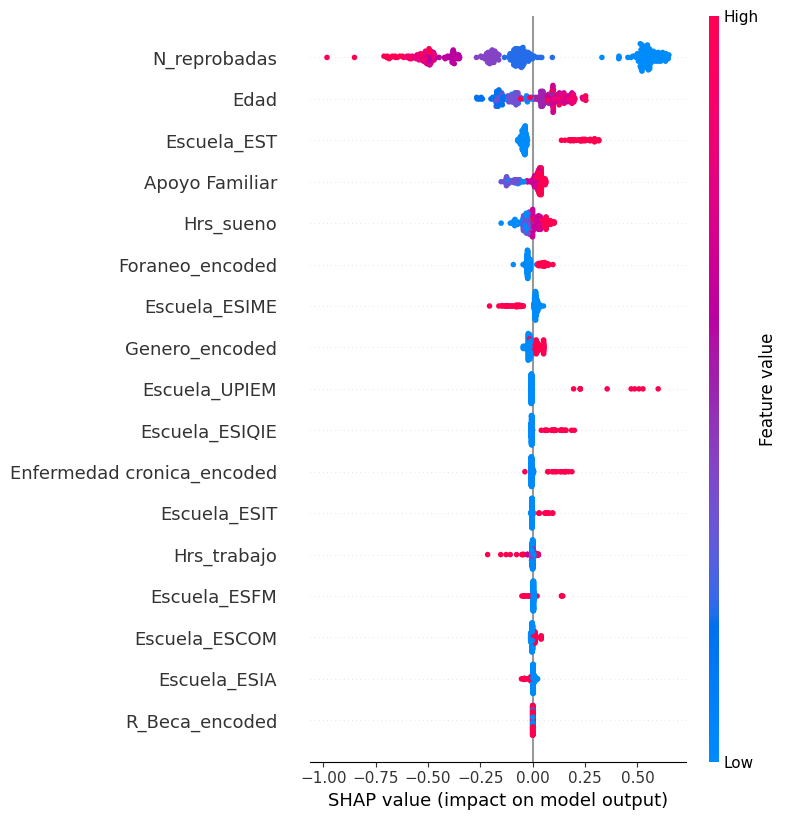

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import shap
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Convertir columnas booleanas a enteros
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include='bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes(include='bool').columns})

# Parámetros para búsqueda aleatoria
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Búsqueda aleatoria de hiperparámetros
random_search_gb = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, n_iter=10, random_state=42
)
random_search_gb.fit(X_train, y_train)
best_gb_model = random_search_gb.best_estimator_

# Predicciones y evaluación del modelo optimizado
y_pred_best_gb = best_gb_model.predict(X_test)
best_gb_r2 = r2_score(y_test, y_pred_best_gb)
best_gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_gb))

# Análisis de importancia de las variables con SHAP
explainer = shap.Explainer(best_gb_model, X_train)
shap_values = explainer(X_test)

# Mostrar resultados del modelo optimizado
optimized_gb_results = {
    "R2 Test": best_gb_r2,
    "RMSE Test": best_gb_rmse
}
print("Resultados del modelo optimizado:", optimized_gb_results)

# Visualización de la importancia de las variables con SHAP
shap.summary_plot(shap_values, X_test)


In [ ]:
optimized_gb_results

{'R2 Test': 0.329510983598683, 'RMSE Test': 0.6344134407505329}

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Codificar columnas si es necesario
if 'Genero_encoded' not in df.columns:
    df['Genero_encoded'] = df['Genero'].map({'Masculino': 0, 'Femenino': 1})

# Generar columnas para 'Escuela' si no existen
if not any(col.startswith('Escuela_') for col in df.columns):
    df = pd.get_dummies(df, columns=['Escuela'], drop_first=True)

# Seleccionar las características y la variable objetivo
features = [
    'N_reprobadas', 'Edad', 'Apoyo Familiar', 'Hrs_estudio',
    'Frecuencia del uso de IA', 'Genero_encoded'
] + [col for col in df.columns if col.startswith('Escuela_')]

target = 'Promedio'

X = df[features]
y = df[target]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=924)

# Imputación de valores faltantes
imputer = SimpleImputer(strategy='mean')  # Rellenar con la media
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Crear un modelo de Gradient Boosting
gboost_model = GradientBoostingRegressor(random_state=772)
gboost_model.fit(X_train, y_train)

# Realizar predicciones con el modelo de Gradient Boosting
y_pred_gboost = gboost_model.predict(X_test)

# Evaluar el modelo de Gradient Boosting
mse_gboost = mean_squared_error(y_test, y_pred_gboost)
mae_gboost = mean_absolute_error(y_test, y_pred_gboost)
r2_gboost = r2_score(y_test, y_pred_gboost)

# Mostrar resultados
mse_gboost, mae_gboost, r2_gboost


(0.41134099427070436, 0.5029622966926479, 0.44008483415239574)

# CLASFICACIÓN

**Librerías**

In [ ]:
#! pip install gspread

#LIBRERÍAS BÁSICAS
import pandas as pd
import numpy as np

#EDA
import matplotlib.pyplot as plt
import seaborn as sns

#PREPROCESAMIENTO
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#MODELADO
from sklearn.cluster import KMeans

#UTILS
import gspread

Convertir el json a csv

In [ ]:
import gspread
import pandas as pd

# Autenticación con las credenciales de servicio
sa = gspread.service_account(filename='service_account.json')

# Abrir la hoja de cálculo específica
sh = sa.open('ProyectoDM')

# Seleccionar la primera hoja
worksheet = sh.sheet1

# Obtener todos los datos de la hoja como registros
data = worksheet.get_all_records()

# Convertir a DataFrame
df = pd.DataFrame(data)

# Guardar el DataFrame como archivo CSV
df.to_csv('dataset.csv', index=False)

**Limpieza previa**

In [ ]:
# Cargar el dataset original y procesar según las instrucciones
import pandas as pd

# Paths de los archivos
dataset_path = '/content/dataset.csv'

# Cargar el dataset original
data = pd.read_csv(dataset_path)

# 1. Eliminar columnas irrelevantes
# Filtrar primero por '3 horas' en P_Validacion
data = data[data['Para validar la lectura de esta encuesta selecciona la opción 3 horas'] == '3 horas']
columns_to_drop = ['Marca temporal', 'Dirección de correo electrónico',
                   'Para validar la lectura de esta encuesta selecciona la opción 3 horas']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# 2. Codificar variables categóricas
# One-Hot Encoding para Escuela y Género
data = pd.get_dummies(data, columns=['¿A qué escuela perteneces?', '¿Cuál es tu género?'], drop_first=True)

# Mapear variables binarias
binary_map = {'Sí': 1, 'No': 0}
binary_columns = {
    '¿Tienes dependientes económicos?': 'Tiene dependientes económicos',
    '¿Tienes personas a tu cuidado?': 'Tiene personas a cargo',
    '¿Eres foráneo?': 'Es foráneo(a)',
    '¿Requieres de apoyos económicos (becas) para sostener tus estudios?': 'Requiere beca',
    '¿Padeces de alguna enfermedad crónica (Por ejemplo: diabetes, hipertensión, asma, etc.)?': 'Padece enfermedad crónica'
}
for original_col, new_col in binary_columns.items():
    if original_col in data.columns:
        data[new_col] = data[original_col].map(binary_map)

# Codificación ordinal
ordinal_mappings = {
    '¿Te gusta tu carrera?': {'Sí': 2, 'Indiferente': 1, 'No': 0},
    '¿Piensas ejercer la carrera?': {'Sí': 2, 'No estoy seguro': 1, 'No': 0}
}
for col, mapping in ordinal_mappings.items():
    if col in data.columns:
        data[col] = data[col].map(mapping)

# Renombrar columnas para alinear con los nombres del gráfico
rename_columns = {
    '¿Cuál es tu promedio global? ': 'Promedio',
    '¿Cuántas materias has reprobado a lo largo de tu trayectoria?': 'N_reprobadas',
    '¿Qué edad tienes? ': 'Edad',
    '¿Cuánto tiempo tardas en llegar a tu escuela en minutos?': 'T_traslado (min)',
    '¿Cuántas horas diarias dedicas al estudio fuera de clases?': 'Hrs_estudio',
    '¿Cuántas horas trabajas al día? \nSi no trabajas, escribe \'0\'.': 'Hrs_trabajo',
    '¿Cuántas horas duermes en promedio al día?': 'Hrs_sueno',
    '¿Con qué frecuencia utilizas herramientas de IA?': 'Frecuencia del uso de IA',
    '¿Te gusta tu carrera?': 'Gusto por la carrera',
    '¿Piensas ejercer la carrera?': 'Piensa ejercer su carrera'
}
data.rename(columns=rename_columns, inplace=True)

# Seleccionar solo las columnas necesarias
final_columns = [
    'Promedio', 'N_reprobadas', 'Edad', 'T_traslado (min)', 'Hrs_estudio', 'Hrs_trabajo',
    'Gusto por la carrera', 'Hrs_sueno', 'Frecuencia del uso de IA',
    'Tiene dependientes económicos', 'Tiene personas a cargo', 'Es foráneo(a)', 'Requiere beca',
    'Padece enfermedad crónica', 'Piensa ejercer su carrera'
]
final_columns += [col for col in data.columns if col.startswith('¿A qué escuela perteneces?_') or col.startswith('¿Cuál es tu género?_')]

# Mantener solo las columnas necesarias
data_final = data[final_columns]

# Guardar el dataset procesado
processed_data_path = '/content/data_processed.csv'
data_final.to_csv(processed_data_path, index=False)
processed_data_path


'/content/data_processed.csv'

**Viusalizaciones importantes previas al modelo**

<ipython-input-43-20ba2a3e504c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=correlations_with_target_updated.index,


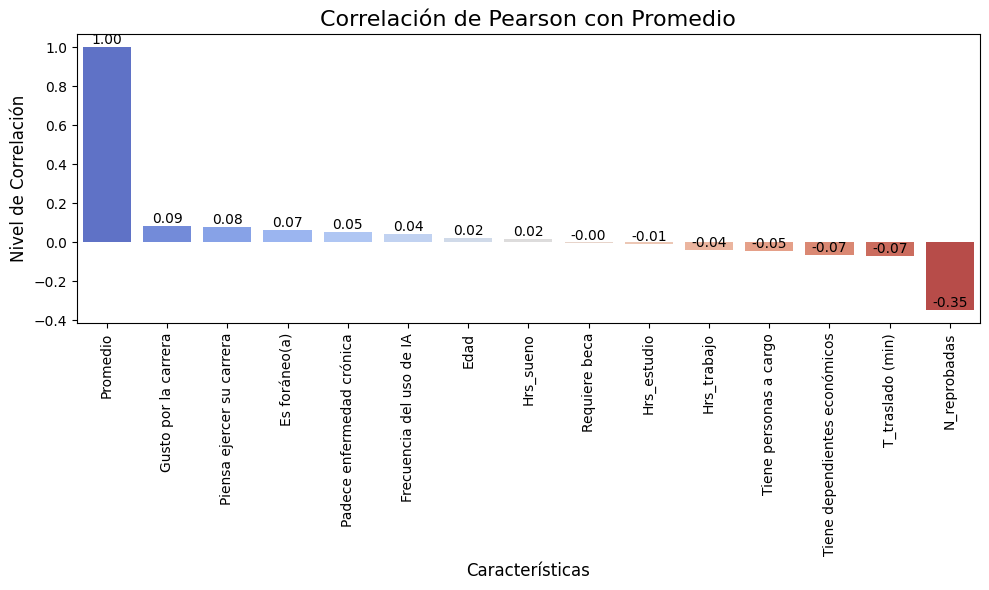

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo modificado
data_for_model = pd.read_csv('data_processed.csv')

# Seleccionar solo las columnas numéricas
data_numeric = data_for_model.select_dtypes(include=['number'])

# Calcular las correlaciones de Pearson
correlations_updated = data_numeric.corr()

# Extraer las correlaciones con la variable objetivo 'Promedio'
correlations_with_target_updated = correlations_updated['Promedio'].sort_values(ascending=False)

# Crear un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=correlations_with_target_updated.index,
                   y=correlations_with_target_updated.values, palette="coolwarm")
plt.title("Correlación de Pearson con Promedio", fontsize=16)
plt.ylabel("Nivel de Correlación", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Características", fontsize=12)

# Agregar los valores de correlación en las barras
for bar, value in zip(bars.patches, correlations_with_target_updated.values):
    bars.annotate(f'{value:.2f}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

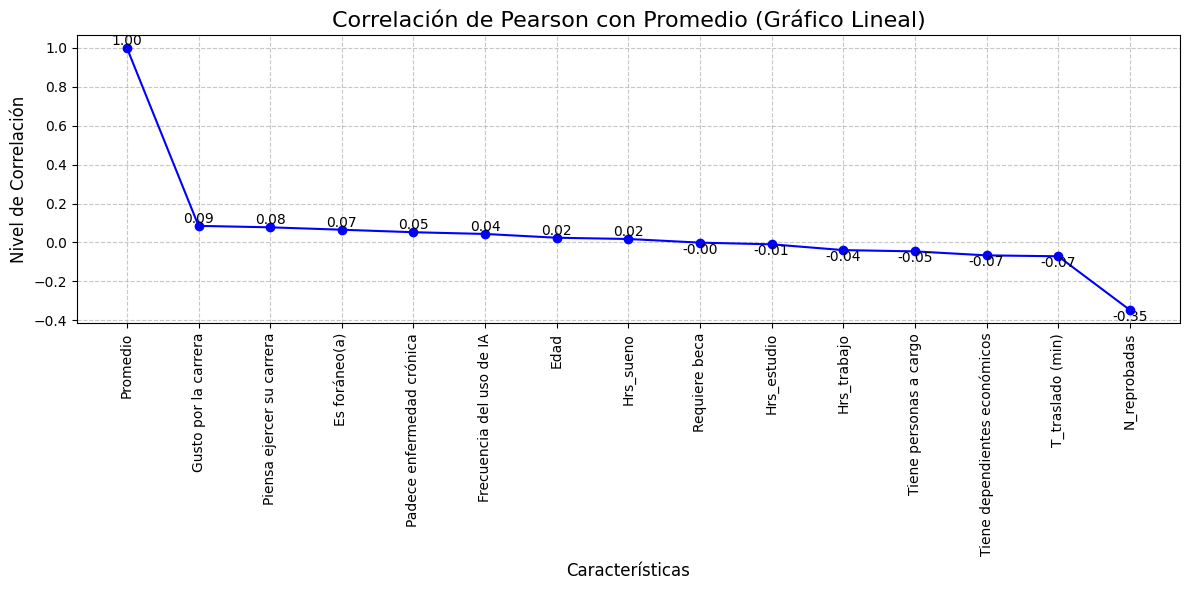

In [ ]:
# Crear un gráfico de líneas para visualizar las correlaciones
plt.figure(figsize=(12, 6))
plt.plot(correlations_with_target_updated.index, correlations_with_target_updated.values, marker='o', linestyle='-', color='b')
plt.title("Correlación de Pearson con Promedio (Gráfico Lineal)", fontsize=16)
plt.ylabel("Nivel de Correlación", fontsize=12)
plt.xlabel("Características", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Agregar los valores de correlación encima de los puntos
for i, value in enumerate(correlations_with_target_updated.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom' if value > 0 else 'top', fontsize=10)

plt.tight_layout()
plt.show()

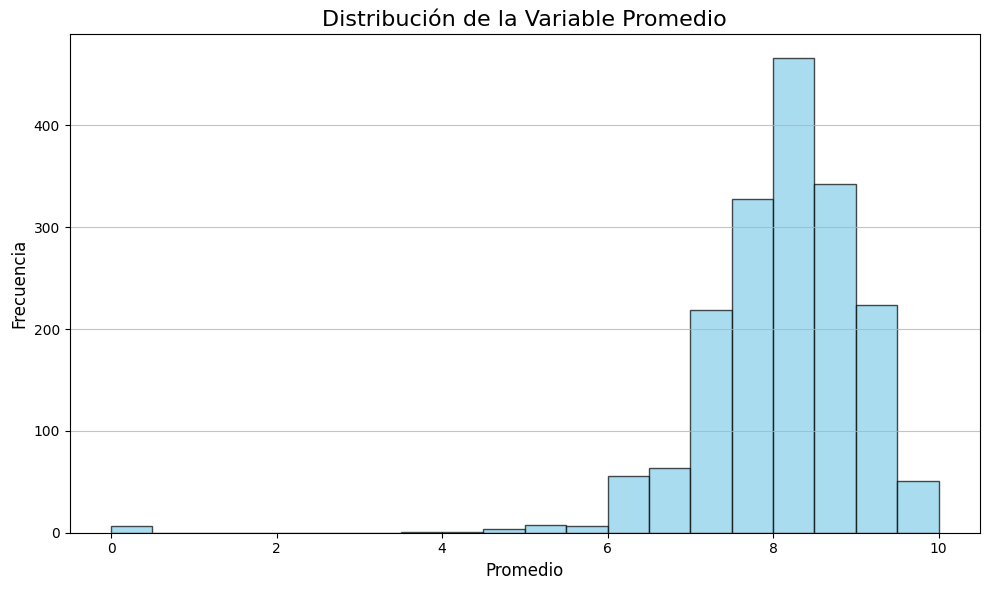

In [ ]:
# Crear un histograma para observar la distribución del promedio
plt.figure(figsize=(10, 6))
plt.hist(data_for_model['Promedio'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribución de la Variable Promedio", fontsize=16)
plt.xlabel("Promedio", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Categorización de la variable "Promedio"

In [ ]:
# Definir una función para categorizar la variable 'Promedio'
def categorize_promedio(promedio):
    if promedio <= 6.0:
        return "Promedio muy bajo (Menor a 6.0)"
    elif 6.0 < promedio <= 7.0:
        return "Promedio bajo (Entre 6.1 y 7.0)"
    elif 7.0 < promedio <= 8.0:
        return "Promedio medio (Entre 7.1 y 8.0)"
    elif 8.0 < promedio <= 9.0:
        return "Promedio alto (Entre 8.1 y 9.0)"
    elif 9.0 < promedio <= 10.0:
        return "Promedio de excelencia (Entre 9.1 y 10)"

# Aplicar la función para crear una nueva columna categorizada
data_for_model['Categoria_Promedio'] = data_for_model['Promedio'].apply(categorize_promedio)

# Verificar las primeras filas del dataset con la nueva columna
print(data_for_model[['Promedio', 'Categoria_Promedio']].head())

# Guardar el dataset actualizado
data_for_model.to_csv('data_1.csv', index=False)

   Promedio                Categoria_Promedio
0       8.4   Promedio alto (Entre 8.1 y 9.0)
1       6.0   Promedio muy bajo (Menor a 6.0)
2       7.7  Promedio medio (Entre 7.1 y 8.0)
3       6.4   Promedio bajo (Entre 6.1 y 7.0)
4       6.5   Promedio bajo (Entre 6.1 y 7.0)


In [ ]:
# Convertir columnas booleanas (True/False) a 0/1
binary_columns = data_for_model.select_dtypes(include=['bool']).columns
data_for_model[binary_columns] = data_for_model[binary_columns].astype(int)

# Eliminar la columna 'Promedio'
#data_for_model = data_for_model.drop(columns=['Promedio'])

# Verificar el cambio
print(data_for_model.head())

# Guardar el dataset actualizado
data_for_model.to_csv('data_2.csv', index=False)

   Promedio  N_reprobadas  Edad  T_traslado (min)  Hrs_estudio  Hrs_trabajo  \
0       8.4           0.0    20              15.0          3.0          0.0   
1       6.0           1.0    19              60.0          1.0          0.0   
2       7.7           0.0    19              60.0          1.0          5.0   
3       6.4           1.0    19              60.0          3.0          1.0   
4       6.5           4.0    21              40.0          4.0          0.0   

   Gusto por la carrera  Hrs_sueno  Frecuencia del uso de IA  \
0                     2        6.0                         4   
1                     2        7.0                         4   
2                     2        5.0                         4   
3                     1        5.0                         1   
4                     2        6.0                         3   

   Tiene dependientes económicos  ...  ¿A qué escuela perteneces?_ESFM  \
0                              0  ...                             

<ipython-input-57-46a86939d241>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette="viridis")


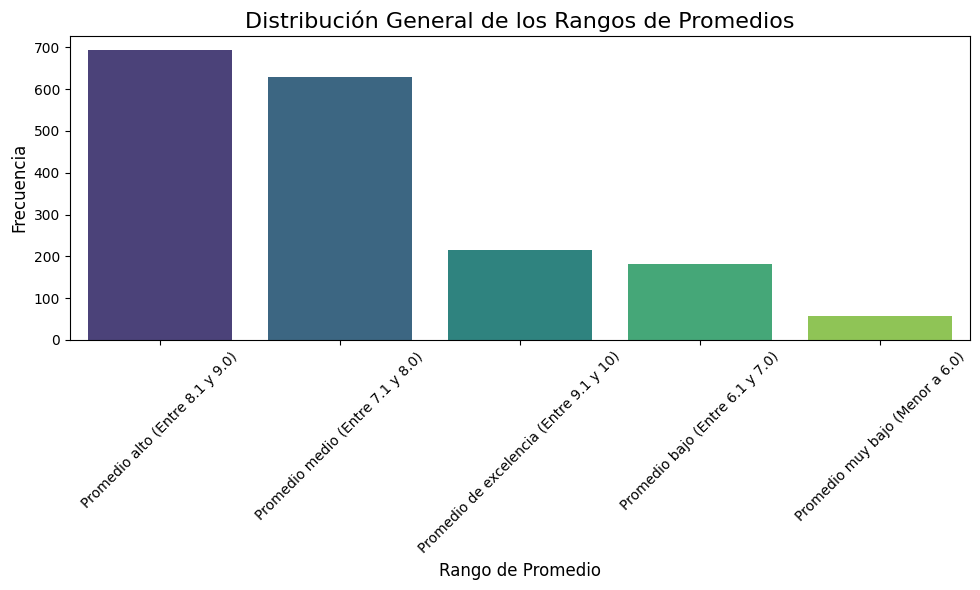

<ipython-input-57-46a86939d241>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered, x="Categoria_Promedio", palette="tab10")


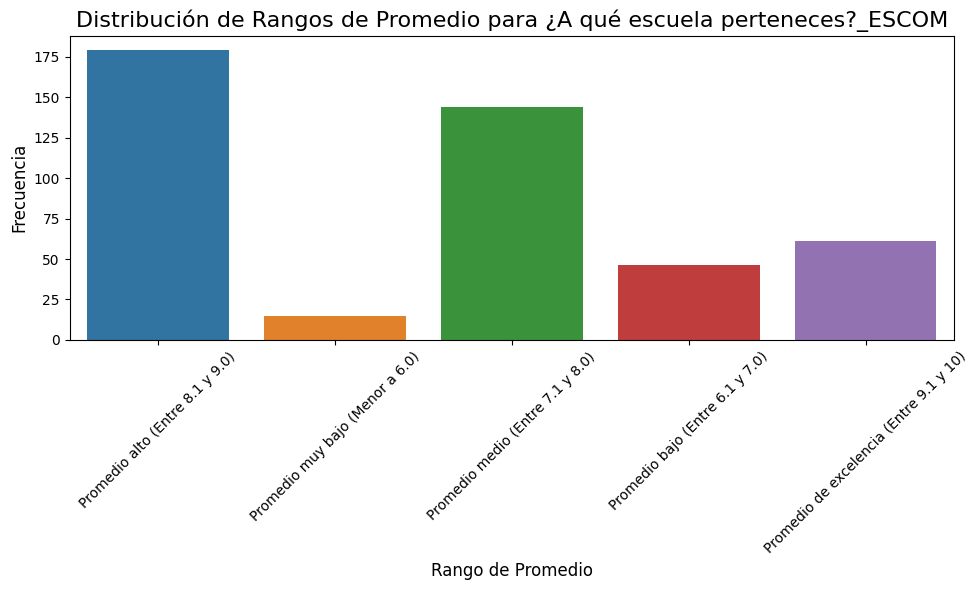

<ipython-input-57-46a86939d241>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered, x="Categoria_Promedio", palette="tab10")


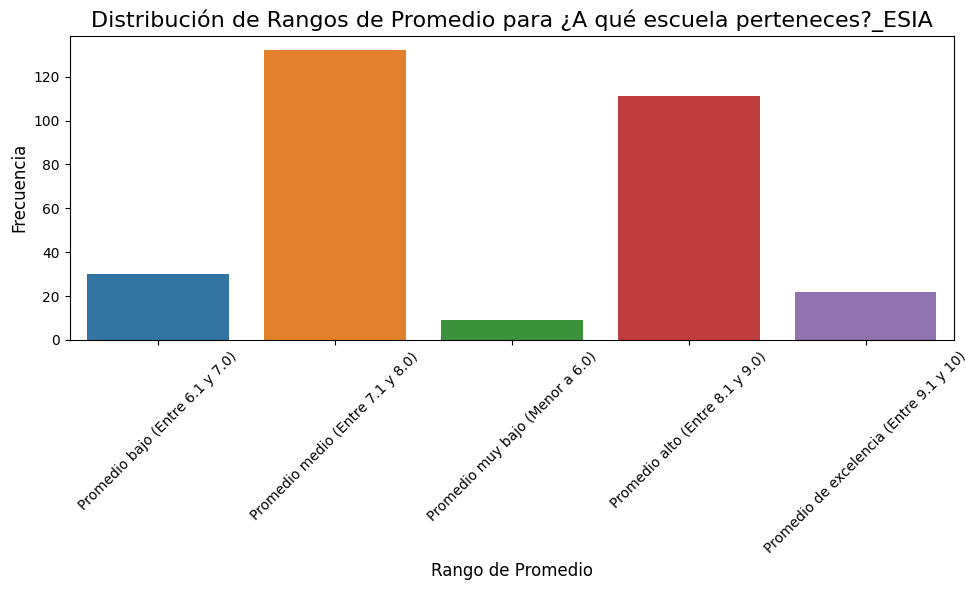

<ipython-input-57-46a86939d241>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered, x="Categoria_Promedio", palette="tab10")


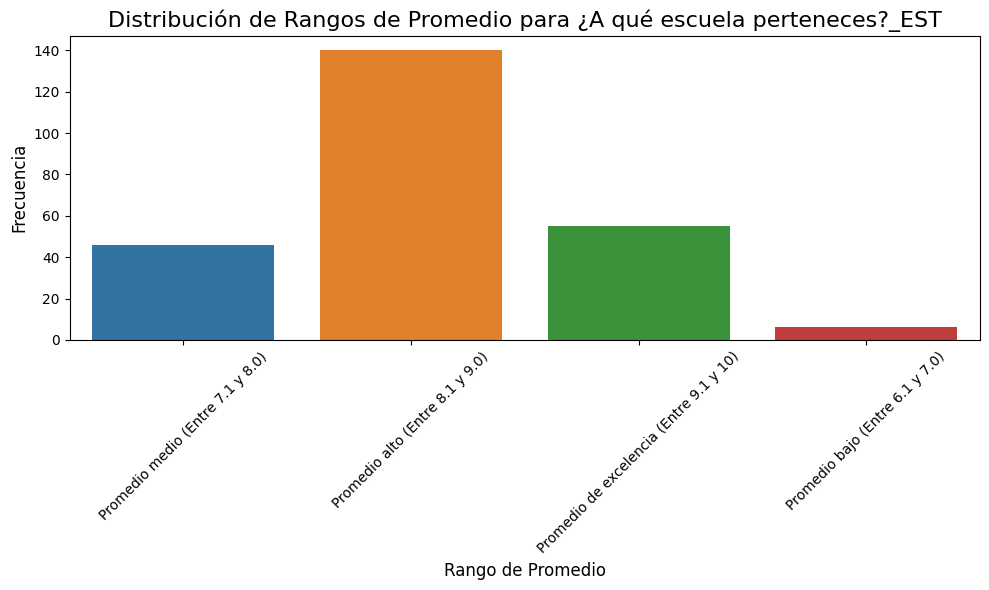

<ipython-input-57-46a86939d241>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered, x="Categoria_Promedio", palette="tab10")


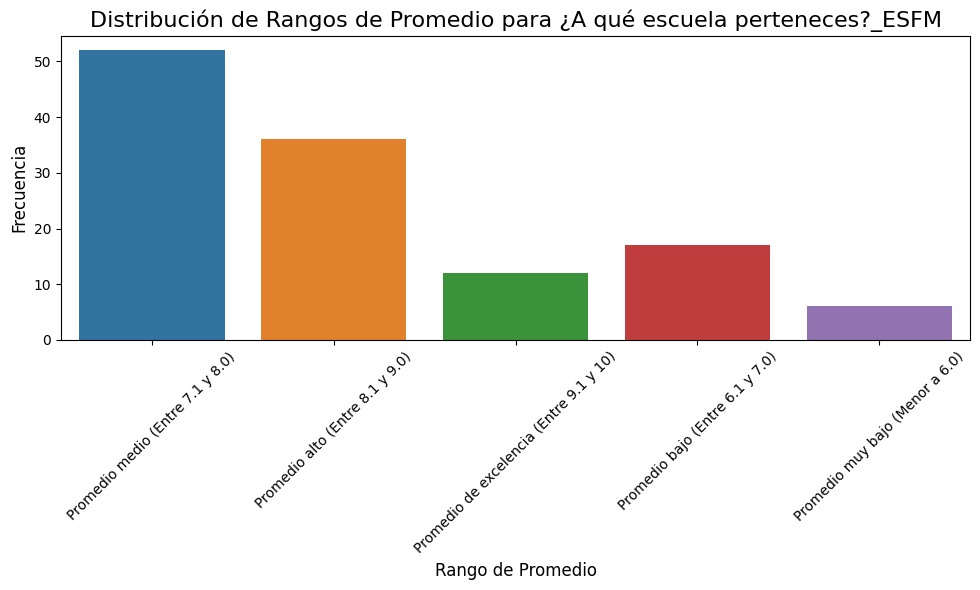

<ipython-input-57-46a86939d241>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered, x="Categoria_Promedio", palette="tab10")


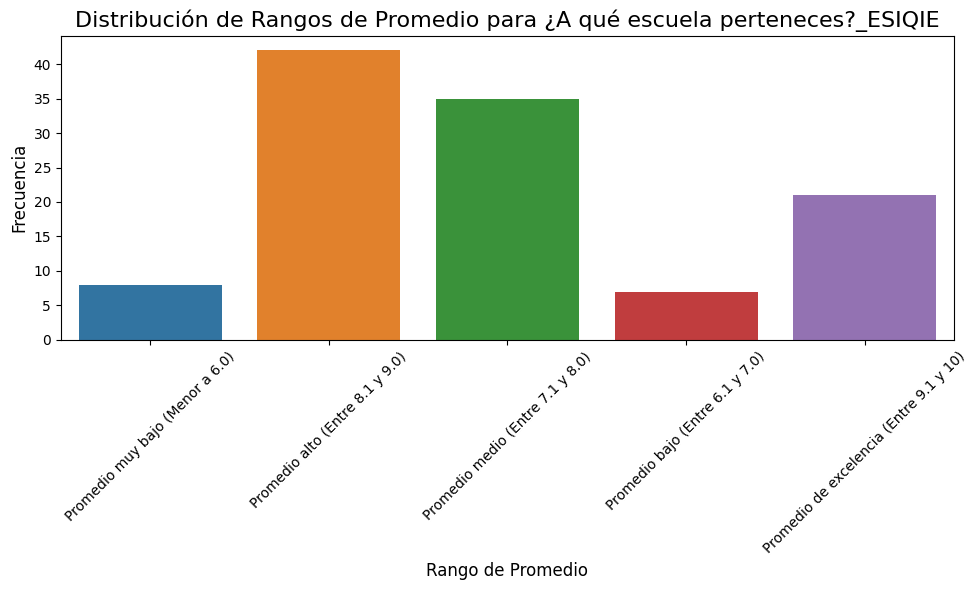

<ipython-input-57-46a86939d241>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered, x="Categoria_Promedio", palette="tab10")


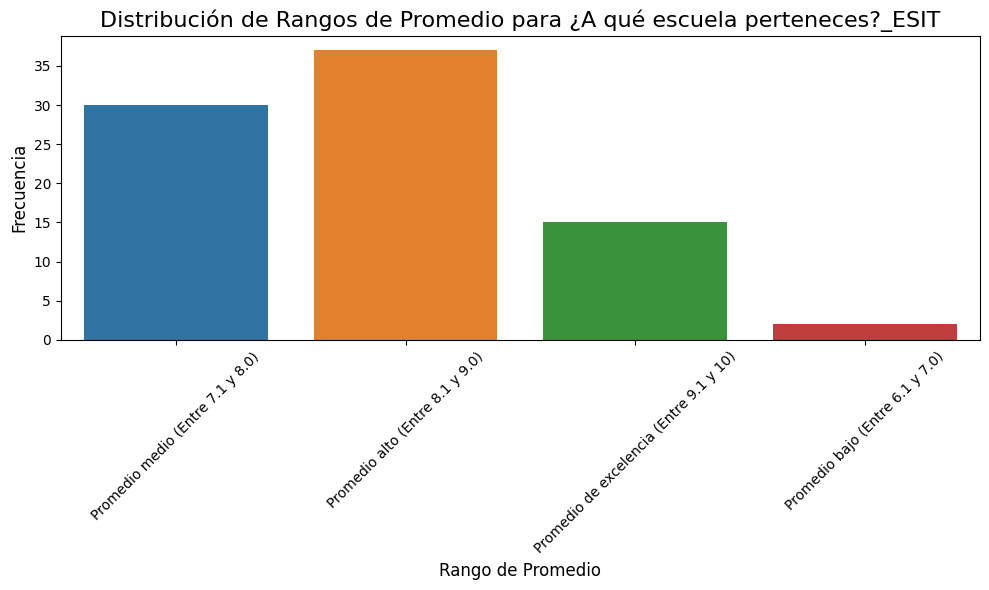

<ipython-input-57-46a86939d241>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered, x="Categoria_Promedio", palette="tab10")


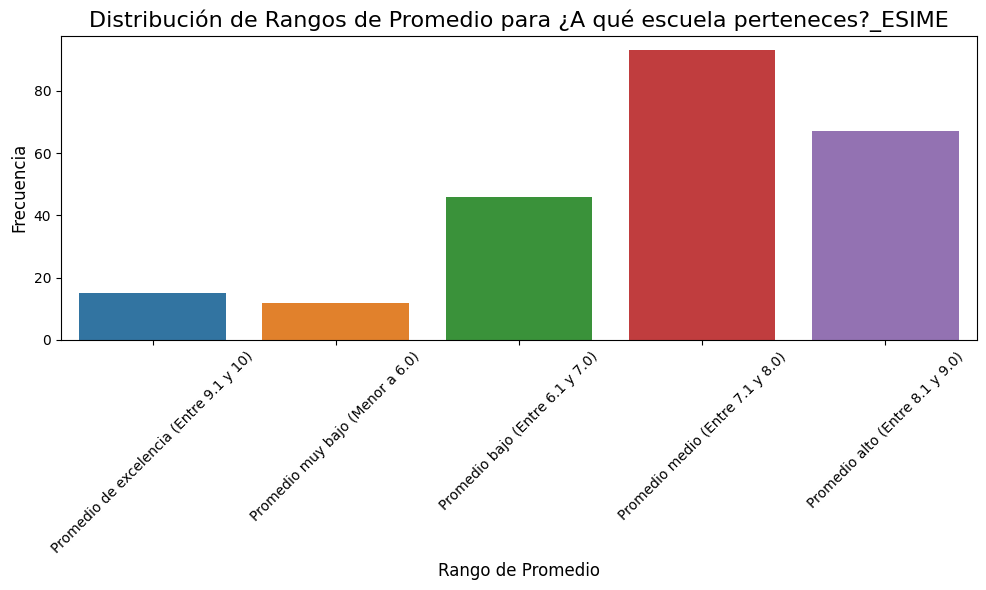

<ipython-input-57-46a86939d241>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered, x="Categoria_Promedio", palette="tab10")


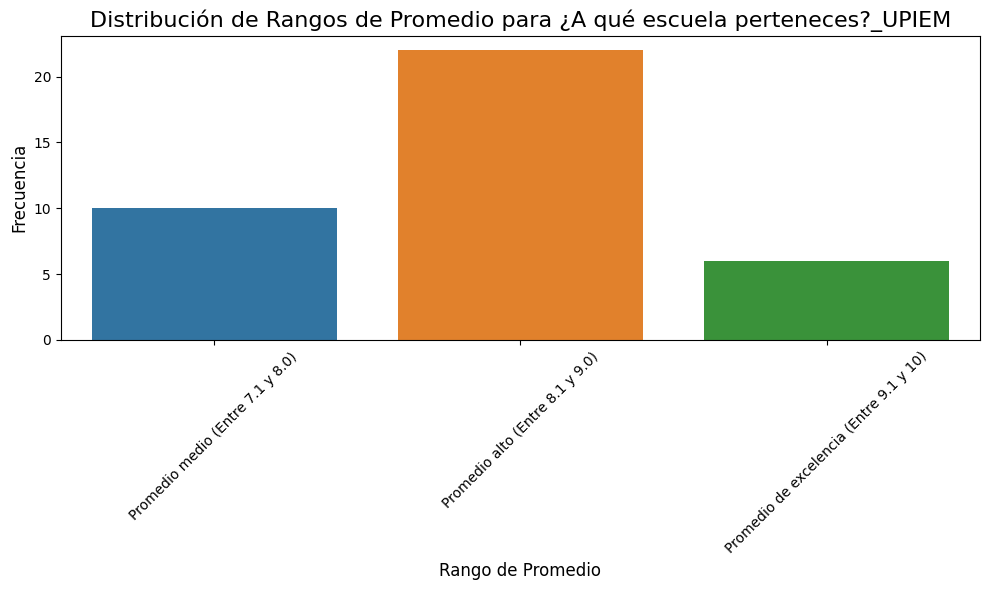

In [ ]:
# Cargar el dataset mencionado
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta al archivo 'data_2.csv'
data_path = '/content/data_2.csv'

# Cargar el dataset
data_final = pd.read_csv(data_path)

# Lista de escuelas ajustada a las columnas reales
escuelas = [
    '¿A qué escuela perteneces?_ESCOM',
    '¿A qué escuela perteneces?_ESIA',
    '¿A qué escuela perteneces?_EST',
    '¿A qué escuela perteneces?_ESFM',
    '¿A qué escuela perteneces?_ESIQIE',
    '¿A qué escuela perteneces?_ESIT',
    '¿A qué escuela perteneces?_ESIME',
    '¿A qué escuela perteneces?_UPIEM'
]

# Crear una gráfica de barras general para los rangos de promedios
# Conteo de cada categoría de promedio
if 'Categoria_Promedio' in data_final.columns:
    categoria_counts = data_final['Categoria_Promedio'].value_counts()

    # Gráfica de barras general
    plt.figure(figsize=(10, 6))
    sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette="viridis")
    plt.title("Distribución General de los Rangos de Promedios", fontsize=16)
    plt.xlabel("Rango de Promedio", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'Categoria_Promedio' no está presente en el dataset.")

# Crear gráficas de barras separadas para cada escuela
for escuela in escuelas:
    if escuela in data_final.columns:
        plt.figure(figsize=(10, 6))
        # Filtrar los datos para estudiantes que pertenecen a la escuela
        data_filtered = data_final[data_final[escuela] == 1]
        if not data_filtered.empty:
            sns.countplot(data=data_filtered, x="Categoria_Promedio", palette="tab10")
            plt.title(f"Distribución de Rangos de Promedio para {escuela}", fontsize=16)
            plt.xlabel("Rango de Promedio", fontsize=12)
            plt.ylabel("Frecuencia", fontsize=12)
            plt.xticks(rotation=45, fontsize=10)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No hay datos para la escuela: {escuela}")
    else:
        print(f"La columna {escuela} no está presente en el dataset.")


In [ ]:
data_final = pd.read_csv('/content/data_2.csv')

In [ ]:
# Verificar si hay valores nulos en el dataset
print(data_final.isnull().sum())

Promedio                                   0
N_reprobadas                               0
Edad                                       0
T_traslado (min)                           0
Hrs_estudio                                0
Hrs_trabajo                                0
Gusto por la carrera                       0
Hrs_sueno                                  0
Frecuencia del uso de IA                   0
Tiene dependientes económicos              0
Tiene personas a cargo                     7
Es foráneo(a)                              0
Requiere beca                              0
Padece enfermedad crónica                  0
Piensa ejercer su carrera                  0
¿A qué escuela perteneces?_ESCOM           0
¿A qué escuela perteneces?_ESFM            0
¿A qué escuela perteneces?_ESIA            0
¿A qué escuela perteneces?_ESIME           0
¿A qué escuela perteneces?_ESIQIE          0
¿A qué escuela perteneces?_ESIT            0
¿A qué escuela perteneces?_EST             0
¿A qué esc

In [ ]:
# Imputar columnas numéricas con la mediana
num_cols = ['N_reprobadas', 'Edad', 'T_traslado (min)', 'Hrs_estudio', 'Hrs_trabajo', 'Hrs_sueno', 'Frecuencia del uso de IA']
data_final[num_cols] = data_final[num_cols].fillna(data_final[num_cols].median())

# Imputar columnas categóricas/binarias con el valor más frecuente (moda)
cat_cols = ['Tiene dependientes económicos', 'Tiene personas a cargo', 'Es foráneo(a)',
            'Requiere beca', 'Padece enfermedad crónica', 'Piensa ejercer su carrera', 'Categoria_Promedio']
data_final[cat_cols] = data_final[cat_cols].fillna(data_final[cat_cols].mode().iloc[0])

# Verificar nuevamente los nulos
print(data_final.isnull().sum())

Promedio                                   0
N_reprobadas                               0
Edad                                       0
T_traslado (min)                           0
Hrs_estudio                                0
Hrs_trabajo                                0
Gusto por la carrera                       0
Hrs_sueno                                  0
Frecuencia del uso de IA                   0
Tiene dependientes económicos              0
Tiene personas a cargo                     0
Es foráneo(a)                              0
Requiere beca                              0
Padece enfermedad crónica                  0
Piensa ejercer su carrera                  0
¿A qué escuela perteneces?_ESCOM           0
¿A qué escuela perteneces?_ESFM            0
¿A qué escuela perteneces?_ESIA            0
¿A qué escuela perteneces?_ESIME           0
¿A qué escuela perteneces?_ESIQIE          0
¿A qué escuela perteneces?_ESIT            0
¿A qué escuela perteneces?_EST             0
¿A qué esc

**Construcción del modelo predictivo: Random Forest**

Experimento 1

In [ ]:
# Importar bibliotecas necesarias
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Preparar X (características) e y (variable objetivo)
data_final = data_final.drop(columns=['Promedio'])
X = data_final.drop(columns=['Categoria_Promedio'])
y = data_final['Categoria_Promedio']

# Dividir el dataset en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=700, max_depth=50, random_state=42)

# Validación cruzada en el conjunto de entrenamiento (5 pliegues)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Mostrar los resultados de la validación cruzada
print("")
print("==========================================================")
print("Resultados de la Validación Cruzada (5 pliegues):")
print("Scores por pliegue:", cv_scores)
print("Accuracy promedio:", cv_scores.mean())

# Entrenar el modelo con todo el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba (20% no visto)
y_pred = rf_model.predict(X_test)

print("")
print("==========================================================")
print("\nResultados en el conjunto de prueba:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Resultados de la Validación Cruzada (5 pliegues):
Scores por pliegue: [0.51929825 0.4877193  0.51408451 0.51056338 0.49647887]
Accuracy promedio: 0.5056288608846058


Resultados en el conjunto de prueba:
Accuracy: 0.5

Matriz de Confusión:
 [[88  1 11 39  0]
 [ 8  1  0 26  1]
 [31  0  4  8  0]
 [38  3  1 84  0]
 [ 2  1  0  8  1]]

Reporte de Clasificación:
                                          precision    recall  f1-score   support

        Promedio alto (Entre 8.1 y 9.0)       0.53      0.63      0.58       139
        Promedio bajo (Entre 6.1 y 7.0)       0.17      0.03      0.05        36
Promedio de excelencia (Entre 9.1 y 10)       0.25      0.09      0.14        43
       Promedio medio (Entre 7.1 y 8.0)       0.51      0.67      0.58       126
        Promedio muy bajo (Menor a 6.0)       0.50      0.08      0.14        12

                               accuracy                           0.50       356
                              macro avg       0.39      0.30      0.30

Aplicación de SMOTE para tratamiento del desbalance

In [ ]:
# Reimportar las bibliotecas tras el reinicio
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd

# Dividir el dataset en 80% entrenamiento y 20% prueba
X = data_final.drop(columns=['Categoria_Promedio'])
y = data_final['Categoria_Promedio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar las clases después de aplicar SMOTE
print("Distribución de Clases Original:", Counter(y_train))
print("Distribución de Clases Balanceada con SMOTE:", Counter(y_train_balanced))

Distribución de Clases Original: Counter({'Promedio alto (Entre 8.1 y 9.0)': 554, 'Promedio medio (Entre 7.1 y 8.0)': 504, 'Promedio de excelencia (Entre 9.1 y 10)': 173, 'Promedio bajo (Entre 6.1 y 7.0)': 145, 'Promedio muy bajo (Menor a 6.0)': 46})
Distribución de Clases Balanceada con SMOTE: Counter({'Promedio medio (Entre 7.1 y 8.0)': 554, 'Promedio de excelencia (Entre 9.1 y 10)': 554, 'Promedio alto (Entre 8.1 y 9.0)': 554, 'Promedio bajo (Entre 6.1 y 7.0)': 554, 'Promedio muy bajo (Menor a 6.0)': 554})


In [ ]:
# Aplicar SMOTE al conjunto de prueba para balancearlo
smote_test = SMOTE(random_state=42, k_neighbors=5)
X_test_balanced, y_test_balanced = smote_test.fit_resample(X_test, y_test)

# Verificar las clases antes y después de aplicar SMOTE al conjunto de prueba
print("Distribución de Clases Original en el Conjunto de Prueba:", Counter(y_test))
print("Distribución de Clases Balanceada con SMOTE en el Conjunto de Prueba:", Counter(y_test_balanced))

Distribución de Clases Original en el Conjunto de Prueba: Counter({'Promedio alto (Entre 8.1 y 9.0)': 139, 'Promedio medio (Entre 7.1 y 8.0)': 126, 'Promedio de excelencia (Entre 9.1 y 10)': 43, 'Promedio bajo (Entre 6.1 y 7.0)': 36, 'Promedio muy bajo (Menor a 6.0)': 12})
Distribución de Clases Balanceada con SMOTE en el Conjunto de Prueba: Counter({'Promedio medio (Entre 7.1 y 8.0)': 139, 'Promedio de excelencia (Entre 9.1 y 10)': 139, 'Promedio bajo (Entre 6.1 y 7.0)': 139, 'Promedio alto (Entre 8.1 y 9.0)': 139, 'Promedio muy bajo (Menor a 6.0)': 139})


Experimento 2

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,  # Aumentamos el número de árboles
    max_depth=15,      # Limitamos la profundidad máxima para evitar sobreajuste
    random_state=42
)

# Realizar validación cruzada en el conjunto de entrenamiento balanceado
cv_scores = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')

# Mostrar los resultados de validación cruzada
print("Resultados de la Validación Cruzada (5 pliegues):")
print("Scores por pliegue:", cv_scores)
print("Accuracy promedio:", cv_scores.mean())

# Entrenar el modelo en el conjunto balanceado completo
rf_model.fit(X_train_balanced, y_train_balanced)

# Evaluar el modelo en el conjunto de prueba no visto
y_pred = rf_model.predict(X_test_balanced)

print("\nResultados en el conjunto de prueba no visto:")
print("Accuracy:", accuracy_score(y_test_balanced, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_balanced, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test_balanced, y_pred))

Resultados de la Validación Cruzada (5 pliegues):
Scores por pliegue: [0.61913357 0.71841155 0.80144404 0.78158845 0.76353791]
Accuracy promedio: 0.7368231046931408

Resultados en el conjunto de prueba no visto:
Accuracy: 0.49640287769784175

Matriz de Confusión:
 [[69  5 24 39  2]
 [ 6 79  5 29 20]
 [34  4 88  9  4]
 [33 15  7 78  6]
 [ 2 79  0 27 31]]

Reporte de Clasificación:
                                          precision    recall  f1-score   support

        Promedio alto (Entre 8.1 y 9.0)       0.48      0.50      0.49       139
        Promedio bajo (Entre 6.1 y 7.0)       0.43      0.57      0.49       139
Promedio de excelencia (Entre 9.1 y 10)       0.71      0.63      0.67       139
       Promedio medio (Entre 7.1 y 8.0)       0.43      0.56      0.49       139
        Promedio muy bajo (Menor a 6.0)       0.49      0.22      0.31       139

                               accuracy                           0.50       695
                              macro avg       0

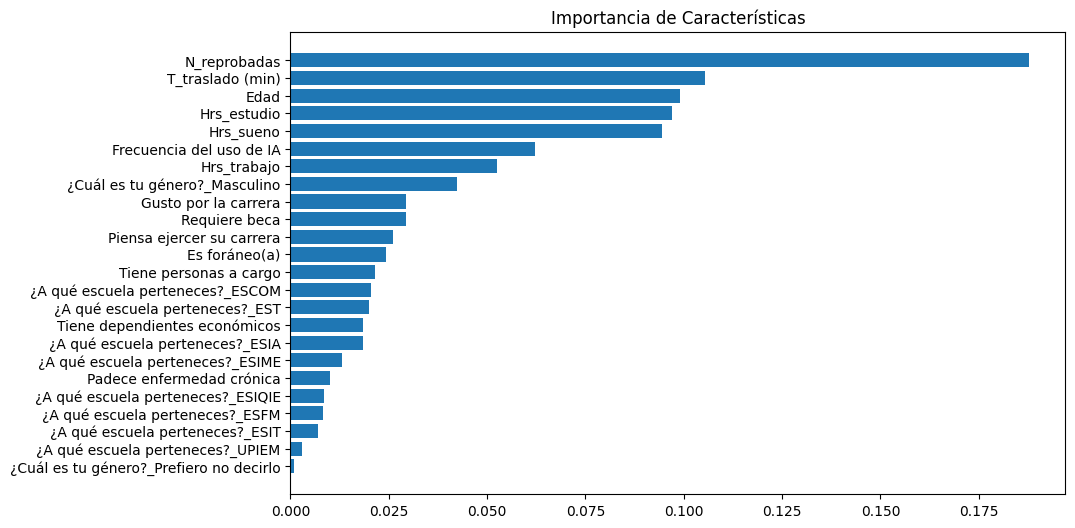

In [ ]:
importances = rf_model.feature_importances_
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [X.columns[i] for i in sorted_indices])
plt.title("Importancia de Características")
plt.show()

Experimento 3

**Advertencia:** Para correr el siguiente código, cargar el data set "*8. data_beta.csv*"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Cargar el dataset actualizado
data_beta_actualizado = pd.read_csv('8. data_beta.csv')
data_beta_actualizado = data_beta_actualizado.dropna()

# Variables predictoras y objetivo
X = data_beta_actualizado.drop(columns=['Categoria_Promedio'])
y = data_beta_actualizado['Categoria_Promedio']

# Codificar las etiquetas de texto a números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Crear el pipeline con normalización y Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de datos
    ('rf', RandomForestClassifier(
        n_estimators=300,        # Número de árboles
        max_depth=15,            # Profundidad máxima
        random_state=42
    ))
])

# Validación cruzada en el conjunto de entrenamiento balanceado
cv_scores = cross_val_score(
    pipeline['rf'],
    StandardScaler().fit_transform(X_train_balanced),
    y_train_balanced,
    cv=5,
    scoring='accuracy'
)

# Mostrar resultados de validación cruzada
print("Resultados de la Validación Cruzada (5 pliegues):")
print("Scores por pliegue:", cv_scores)
print("Accuracy promedio:", cv_scores.mean())

# Entrenar el modelo en el conjunto de entrenamiento balanceado
pipeline.fit(X_train_balanced, y_train_balanced)

# Evaluar el modelo en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Decodificar etiquetas para reporte
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Resultados
print("\nResultados del modelo Random Forest con las nuevas clases:")
print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_decoded, y_pred_decoded, labels=label_encoder.classes_))
print("\nReporte de Clasificación:\n", classification_report(y_test_decoded, y_pred_decoded, target_names=label_encoder.classes_))

Resultados de la Validación Cruzada (5 pliegues):
Scores por pliegue: [0.74137931 0.74740484 0.74394464 0.74394464 0.75432526]
Accuracy promedio: 0.7461997375014915

Resultados del modelo Random Forest con las nuevas clases:
Accuracy: 0.7542372881355932

Matriz de Confusión:
 [[140  41]
 [ 46 127]]

Reporte de Clasificación:
                                             precision    recall  f1-score   support

          Promedio alto (Entre 8.1 y 10.0)       0.75      0.77      0.76       181
Promedio de bajo a medio (Entre 0.0 y 8.0)       0.76      0.73      0.74       173

                                  accuracy                           0.75       354
                                 macro avg       0.75      0.75      0.75       354
                              weighted avg       0.75      0.75      0.75       354



Para obtener un mejor rendimiento, en el siguiente experimento se hizo una selección de caracterísiticas y se ajustaron los parámetros del random forest.

In [ ]:
import pandas as pd
import joblib
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Cargar el dataset actualizado
data_beta_actualizado = pd.read_csv('8. data_beta.csv')
data_beta_actualizado = data_beta_actualizado.dropna()

# Variables predictoras y objetivo
X = data_beta_actualizado.drop(columns=['Categoria_Promedio', 'Tiene personas a cargo',
                                        'Padece enfermedad crónica', 'Piensa ejercer su carrera',
                                        'Tiene dependientes económicos'])
y = data_beta_actualizado['Categoria_Promedio']

# Codificar las etiquetas de texto a números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Crear el pipeline con normalización y Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de datos
    ('rf', RandomForestClassifier(
        n_estimators=875,        # Número de árboles
        max_depth=14,            # Profundidad máxima
        max_features='sqrt',
        random_state=42
    ))
])

# Entrenar el modelo en el conjunto de entrenamiento balanceado
pipeline.fit(X_train_balanced, y_train_balanced)

# Guardar el pipeline entrenado y las columnas de entrenamiento
joblib.dump(pipeline, 'random_forest_pipeline.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(X.columns, 'columnas_entrenamiento.pkl')

print("Modelo, codificador y columnas de entrenamiento guardados correctamente.")

Modelo, codificador y columnas de entrenamiento guardados correctamente.


Como este fue el experiento en el que el modelo demostró un mejor rendimiento comparado con los demás experiemtos, nos quedamos con este modelo para guardarlo y realizar predicciones de entrada posteriormente.

También cabe recalcar que el modelo ya no podrá subir su rendimeinto a causa de la calidad y cantidad de datos con los que contamos.

**Modelo puesto a usabilidad**

In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import OneHotEncoder

# Diccionario para mapear las escuelas
escuelas_codificacion = {
    "ESCOM": 1,
    "ESIA": 2,
    "ENCB": 3,
    "UPIEM": 4,
    "ESFM": 5,
    "ESIQIE": 6,
    "ESIT": 7,
    "EST": 8,
    "ESIME": 9
}

# Definir rango válido para Frecuencia del uso de herramientas de IA
rango_frecuencia_ia = (0, 5)  # Ejemplo: 0 (nunca) a 5 (muy frecuentemente)

# Función para cargar el modelo y hacer predicciones
def predecir_promedio():
    """
    Función para predecir la categoría de promedio basada en los datos ingresados por el usuario.

    Retorno:
    Resultado de la predicción con la categoría correspondiente.
    """
    # Cargar el pipeline, el codificador y las columnas del entrenamiento
    pipeline = joblib.load('random_forest_pipeline.pkl')
    label_encoder = joblib.load('label_encoder.pkl')
    columnas_entrenamiento = joblib.load('columnas_entrenamiento.pkl')

    # Pedir datos al usuario
    print("\nPor favor, ingrese los siguientes datos:")
    edad = int(input("Edad: "))
    genero = int(input("Género (1: Masculino, 0: Femenino): "))

    # Mostrar las opciones de escuelas
    print("\nEscuelas disponibles:")
    for escuela, codigo in escuelas_codificacion.items():
        print(f"{codigo}: {escuela}")

    # Obtener el nombre de la escuela
    escuela_input = input("\nIngrese el nombre de su escuela (por ejemplo: ESCOM): ").strip().upper()

    # Verificar si la escuela ingresada es válida
    if escuela_input not in escuelas_codificacion:
        print("Error: La escuela ingresada no es válida.")
        return

    escuela_codificada = escuelas_codificacion[escuela_input]

    # Pedir los demás datos
    materias_reprobadas = int(input("Número de materias que has reprobado: "))
    traslado = int(input("Tiempo de traslado (en minutos): "))
    trabajo = int(input("Horas de trabajo al día  (0 si no trabaja): "))
    gusto_carrera = int(input("Gusto por la carrera (2: Sí, 1: Indiferente, 0: No): "))
    horas_sueno = float(input("Horas de sueño: "))

    # Mostrar rango para Frecuencia del uso de herramientas de IA
    print(f"Frecuencia del uso de herramientas de IA (Rango permitido: {rango_frecuencia_ia[0]} - nunca a {rango_frecuencia_ia[1]} - muy frecuentemente):")
    uso_ia = int(input("Ingrese la frecuencia: "))

    # Validar el valor ingresado
    if uso_ia < rango_frecuencia_ia[0] or uso_ia > rango_frecuencia_ia[1]:
        print(f"Error: El valor debe estar entre {rango_frecuencia_ia[0]} y {rango_frecuencia_ia[1]}.")
        return

    # Crear un DataFrame con los datos del usuario
    datos_usuario = {
        'Edad': edad,
        'Género': genero,
        'Escuela': escuela_codificada,
        'Número de materias reprobadas hasta el momento': materias_reprobadas,
        'Tiempo de traslado (en minutos)': traslado,
        'Horas de trabajo (0 si no trabajas)': trabajo,
        'Gusto por la carrera': gusto_carrera,
        'Horas de sueño': horas_sueno,
        'Frecuencia del uso de herramientas de IA': uso_ia
    }
    datos_df = pd.DataFrame([datos_usuario])

    # Asegurar consistencia con las columnas del entrenamiento
    datos_df = datos_df.reindex(columns=columnas_entrenamiento, fill_value=0)

    # Predecir con el modelo cargado
    prediccion_codificada = pipeline.predict(datos_df)
    prediccion_decodificada = label_encoder.inverse_transform(prediccion_codificada)

    print(f"\nSe estima que tengas un {prediccion_decodificada[0]}")

# Llamar a la función para predecir
predecir_promedio()


Por favor, ingrese los siguientes datos:
Edad: 20
Género (1: Masculino, 0: Femenino): 1

Escuelas disponibles:
1: ESCOM
2: ESIA
3: ENCB
4: UPIEM
5: ESFM
6: ESIQIE
7: ESIT
8: EST
9: ESIME

Ingrese el nombre de su escuela (por ejemplo: ESCOM): ESCOM
Número de materias que has reprobado: 1
Tiempo de traslado (en minutos): 50
Horas de trabajo al día  (0 si no trabaja): 0
Gusto por la carrera (2: Sí, 1: Indiferente, 0: No): 2
Horas de sueño: 6
Frecuencia del uso de herramientas de IA (Rango permitido: 0 - nunca a 5 - muy frecuentemente):
Ingrese la frecuencia: 4

Se estima que tengas un Promedio alto (Entre 8.1 y 10.0)


# RED NEURONAL

### Preprocessing

In [ ]:
import os
import gspread
import pandas as pd

json_path = os.path.join(os.getcwd(), 'service_account.json')

sa = gspread.service_account(filename=json_path)
sh = sa.open('ProyectoDM')

worksheet = sh.sheet1
data = worksheet.get_all_records()
df = pd.DataFrame(data)

renamed_columns = {
    # 'Marca temporal': 'marca_temporal',
    # 'Dirección de correo electrónico': 'correo',
    '¿A qué escuela perteneces?': 'escuela',
    '¿Cuál es tu promedio global? ': 'promedio_global',
    '¿Cuántas materias has reprobado a lo largo de tu trayectoria?': 'materias_reprobadas',
    '¿Qué edad tienes? ': 'edad',
    '¿Cuál es tu género?': 'genero',
    '¿Tienes dependientes económicos?': 'dependientes_economicos',
    '¿Tienes personas a tu cuidado?': 'personas_a_cargo',
    '¿Te sientes apoyado por tu familia?': 'apoyo_familiar',
    '¿Requieres de apoyos económicos (becas) para sostener tus estudios?': 'apoyos_economicos',
    '¿Eres foráneo?': 'foraneo',
    '¿Cuánto tiempo tardas en llegar a tu escuela en minutos?': 'minutos_traslado',
    '¿Cuántas horas diarias dedicas al estudio fuera de clases?': 'horas_estudio',
    'Para validar la lectura de esta encuesta selecciona la opción 3 horas': 'validacion_encuesta',
    '¿Cuántas horas trabajas al día? \nSi no trabajas, escribe \'0\'.': 'horas_trabajo',
    '¿Padeces de alguna enfermedad crónica (Por ejemplo: diabetes, hipertensión, asma, etc.)?': 'enfermedad_cronica',
    '¿Te gusta tu carrera?': 'satisfaccion_carrera',
    '¿Piensas ejercer la carrera?': 'ejercer_carrera',
    '¿Cuántas horas duermes en promedio al día?': 'horas_sueno',
    '¿Con qué frecuencia utilizas herramientas de IA?': 'frecuencia_IA',
}

df.drop(columns=['Marca temporal', 'Dirección de correo electrónico'], inplace=True)
df.rename(columns=renamed_columns, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   escuela                  1834 non-null   object 
 1   promedio_global          1834 non-null   float64
 2   materias_reprobadas      1834 non-null   float64
 3   edad                     1834 non-null   int64  
 4   genero                   1834 non-null   object 
 5   dependientes_economicos  1834 non-null   object 
 6   personas_a_cargo         1834 non-null   object 
 7   apoyo_familiar           1834 non-null   int64  
 8   apoyos_economicos        1834 non-null   object 
 9   foraneo                  1834 non-null   object 
 10  minutos_traslado         1834 non-null   float64
 11  horas_estudio            1834 non-null   float64
 12  validacion_encuesta      1834 non-null   object 
 13  horas_trabajo            1834 non-null   float64
 14  enfermedad_cronica      

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Store mappings
mappings = {}

columns_list = [
    'escuela', 'genero', 'dependientes_economicos', 'personas_a_cargo',
    'apoyos_economicos', 'foraneo', 'validacion_encuesta',
    'enfermedad_cronica', 'satisfaccion_carrera', 'ejercer_carrera'
]

for column in columns_list:
    label_encoder = LabelEncoder()

    # Fit and transform the column
    df[f'{column}_encoded'] = label_encoder.fit_transform(df[column])

    # Store the mapping of old values to new values
    mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the old and new values
for column, mapping in mappings.items():
    print(f"Column: {column}")
    for original, encoded in mapping.items():
        print(f"  {original} -> {encoded}")
    print("\n")


Column: escuela
  ENCB -> 0
  ESCOM -> 1
  ESFM -> 2
  ESIA -> 3
  ESIME -> 4
  ESIQIE -> 5
  ESIT -> 6
  EST -> 7
  UPIEM -> 8


Column: genero
  Femenino -> 0
  Masculino -> 1
  Prefiero no decirlo -> 2


Column: dependientes_economicos
  No -> 0
  Sí -> 1


Column: personas_a_cargo
   -> 0
  No -> 1
  Sí -> 2


Column: apoyos_economicos
  No -> 0
  Sí -> 1


Column: foraneo
  No -> 0
  Sí -> 1


Column: validacion_encuesta
  1 hora -> 0
  2 horas -> 1
  3 horas -> 2


Column: enfermedad_cronica
  No -> 0
  Sí -> 1


Column: satisfaccion_carrera
  Indiferente -> 0
  No -> 1
  Sí -> 2


Column: ejercer_carrera
  No -> 0
  No estoy seguro -> 1
  Sí -> 2




In [ ]:
# Remove columns that have not been encoded
df.drop(columns=[
    'escuela', 'genero', 'dependientes_economicos', 'personas_a_cargo',
    'apoyos_economicos', 'foraneo', 'validacion_encuesta',
    'enfermedad_cronica', 'satisfaccion_carrera', 'ejercer_carrera'
], inplace=True)

# Rename the encoded columns
df.rename(columns={
    'escuela_encoded': 'escuela',
    'genero_encoded': 'genero',
    'dependientes_economicos_encoded': 'dependientes_economicos',
    'personas_a_cargo_encoded': 'personas_a_cargo',
    'apoyos_economicos_encoded': 'apoyos_economicos',
    'foraneo_encoded': 'foraneo',
    'validacion_encuesta_encoded': 'validacion_encuesta',
    'enfermedad_cronica_encoded': 'enfermedad_cronica',
    'satisfaccion_carrera_encoded': 'satisfaccion_carrera',
    'ejercer_carrera_encoded': 'ejercer_carrera'
}, inplace=True)

# Save the processed data
df.to_csv('processed_data.csv', index=False)

### Analysis

In [ ]:
import os
import pandas as pd

path = os.path.join(os.getcwd(), 'processed_data.csv')
df = pd.read_csv(path)

df.head()

,promedio_global,materias_reprobadas,edad,apoyo_familiar,minutos_traslado,horas_estudio,horas_trabajo,horas_sueno,frecuencia_IA,escuela,genero,dependientes_economicos,personas_a_cargo,apoyos_economicos,foraneo,validacion_encuesta,enfermedad_cronica,satisfaccion_carrera,ejercer_carrera
0,8.4,0.0,20,5,15.0,3.0,0.0,6.0,4,1,1,0,1,1,1,2,0,2,2
1,6.0,1.0,19,5,60.0,1.0,0.0,7.0,4,1,1,1,1,0,0,2,0,2,2
2,7.7,0.0,19,5,60.0,1.0,5.0,5.0,4,1,1,0,1,0,0,2,0,2,2
3,6.4,1.0,19,5,60.0,3.0,1.0,5.0,1,1,1,0,1,1,0,2,0,0,2
4,6.5,4.0,21,5,40.0,4.0,0.0,6.0,3,1,1,0,1,0,0,2,0,2,2


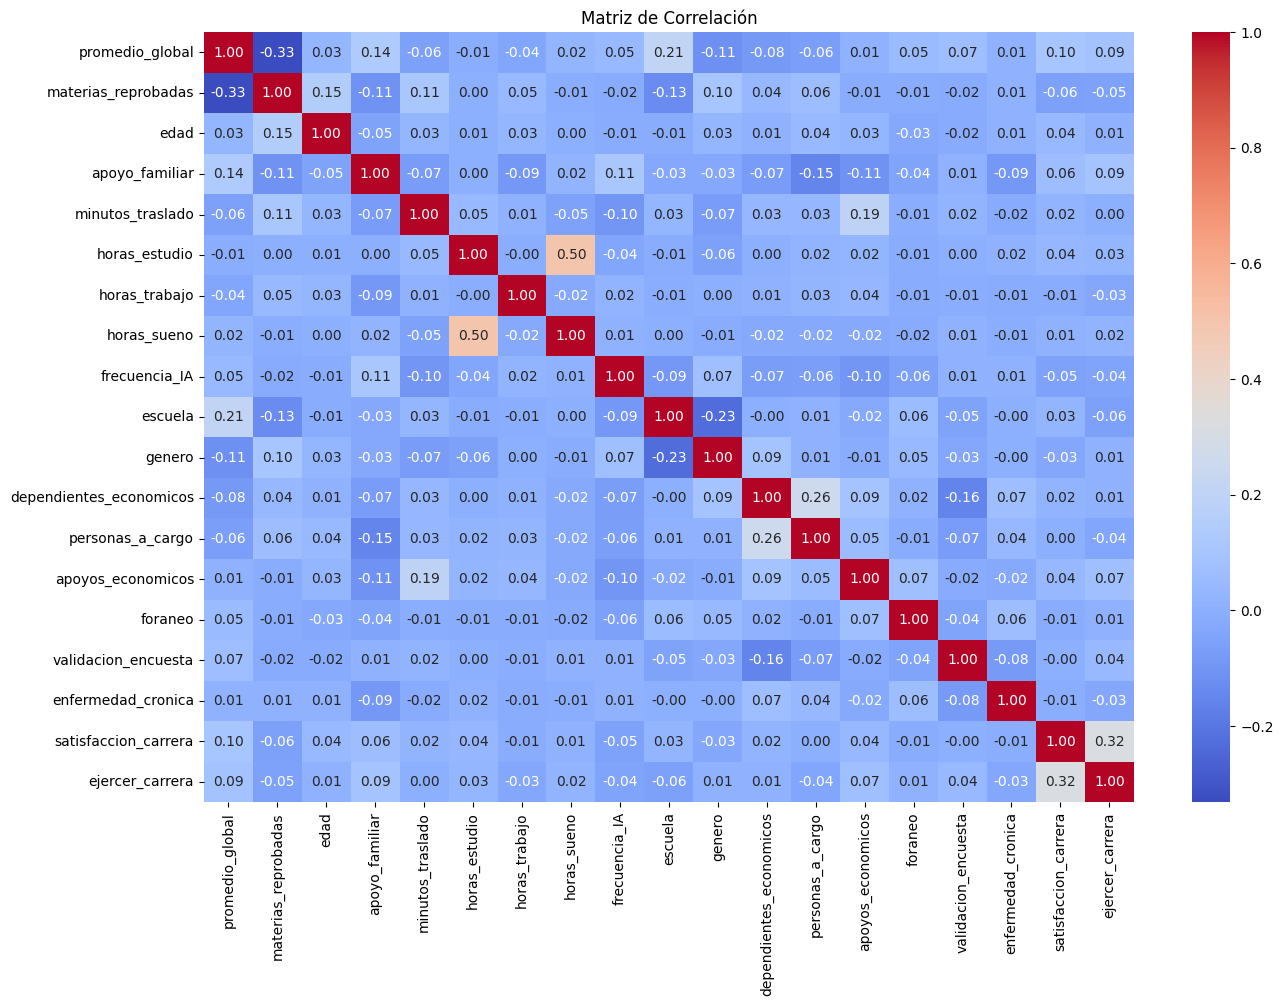

In [ ]:
# Matriz de correlación
correlation_matrix = df.corr()

# Visualización (opcional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [ ]:
# Analysis of feature importance

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['promedio_global'])
y = df['promedio_global']

model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Show feature importances
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
print(feature_importance.sort_values(by='importance', ascending=False))


                    feature  importance
0       materias_reprobadas    0.220034
1                      edad    0.113201
8                   escuela    0.103252
3          minutos_traslado    0.090402
6               horas_sueno    0.085398
4             horas_estudio    0.076142
7             frecuencia_IA    0.059407
2            apoyo_familiar    0.052987
5             horas_trabajo    0.041563
9                    genero    0.039298
17          ejercer_carrera    0.027137
13                  foraneo    0.019207
16     satisfaccion_carrera    0.018020
12        apoyos_economicos    0.014862
10  dependientes_economicos    0.012870
11         personas_a_cargo    0.011204
15       enfermedad_cronica    0.010592
14      validacion_encuesta    0.004425


In [ ]:
# Feature selection

from sklearn.feature_selection import SelectKBest, f_classif

# Select the 5 best features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# See selected features
selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['materias_reprobadas', 'apoyo_familiar', 'escuela', 'apoyos_economicos',
       'ejercer_carrera'],
      dtype='object')


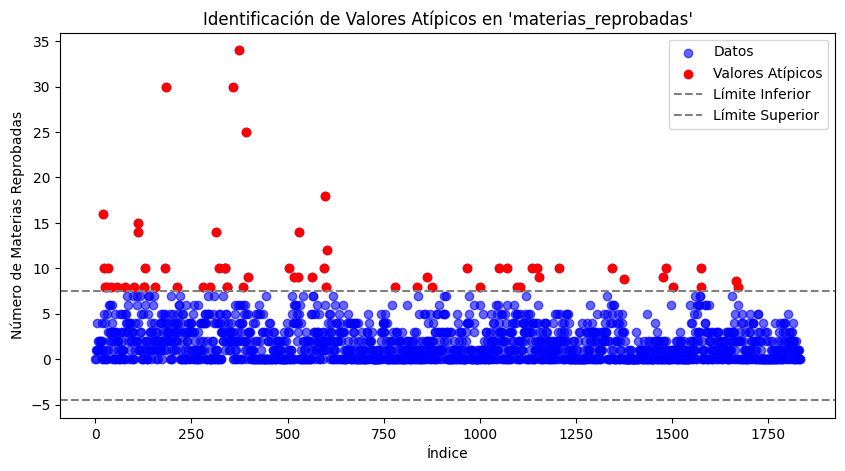

In [ ]:
import matplotlib.pyplot as plt

Q1 = df['materias_reprobadas'].quantile(0.25)
Q3 = df['materias_reprobadas'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['materias_reprobadas'] < lower_bound) | (df['materias_reprobadas'] > upper_bound)]

# Graficar distribución de los datos con valores atípicos resaltados
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['materias_reprobadas'], label="Datos", color='blue', alpha=0.6)
plt.scatter(outliers.index, outliers['materias_reprobadas'], label="Valores Atípicos", color='red', marker='o')
plt.axhline(y=lower_bound, color='gray', linestyle='dashed', label="Límite Inferior")
plt.axhline(y=upper_bound, color='gray', linestyle='dashed', label="Límite Superior")
plt.title("Identificación de Valores Atípicos en 'materias_reprobadas'")
plt.xlabel("Índice")
plt.ylabel("Número de Materias Reprobadas")
plt.legend()
plt.show()

In [ ]:
df_cleaned = df[(df['materias_reprobadas'] >= lower_bound) & (df['materias_reprobadas'] <= upper_bound)]
df_cleaned.describe()

,promedio_global,materias_reprobadas,edad,apoyo_familiar,minutos_traslado,horas_estudio,horas_trabajo,horas_sueno,frecuencia_IA,escuela,genero,dependientes_economicos,personas_a_cargo,apoyos_economicos,foraneo,validacion_encuesta,enfermedad_cronica,satisfaccion_carrera,ejercer_carrera
count,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000
mean,8.047149,1.694579,21.127612,4.251270,85.340203,3.570525,1.979673,5.675494,3.005647,3.214003,0.565217,0.186900,1.095426,0.688876,0.289667,1.954828,0.076228,1.705251,1.847544
std,1.020868,1.816965,4.522709,1.046162,43.769816,10.855701,10.520756,5.729791,1.173132,2.361639,0.510465,0.389941,0.307048,0.463084,0.453736,0.269322,0.265438,0.688132,0.413635
min,0.000000,0.000000,16.000000,1.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,0.000000,20.000000,4.000000,50.000000,2.000000,0.000000,5.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000
50%,8.100000,1.000000,21.000000,5.000000,90.000000,3.000000,0.000000,6.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,2.000000
75%,8.700000,3.000000,22.000000,5.000000,120.000000,4.000000,3.000000,6.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000
max,10.000000,7.000000,190.000000,5.000000,180.000000,240.000000,300.000000,240.000000,5.000000,8.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000


In [ ]:
# Save cleaned data
path_cleaned = os.path.join(os.getcwd(), 'processed_data_cleaned.csv')
df_cleaned.to_csv(path_cleaned, index=False)

## Model Training

In [ ]:
import os
import sys
import pandas as pd
import torch

dataset_path = os.path.join(os.getcwd(), 'processed_data.csv')
df = pd.read_csv(dataset_path)

selected_features = ['escuela', 'materias_reprobadas', 'apoyo_familiar', 'apoyos_economicos', 'ejercer_carrera']
X = df[selected_features]
y = df['promedio_global']

X.describe()

,escuela,materias_reprobadas,apoyo_familiar,apoyos_economicos,ejercer_carrera
count,1833.000000,1833.000000,1833.00000,1833.000000,1833.000000
mean,3.188216,2.009547,4.23677,0.691217,1.844517
std,2.357751,2.639476,1.05763,0.462118,0.417080
min,0.000000,0.000000,1.00000,0.000000,0.000000
25%,1.000000,0.000000,4.00000,0.000000,2.000000
50%,3.000000,1.000000,5.00000,1.000000,2.000000
75%,5.000000,3.000000,5.00000,1.000000,2.000000
max,8.000000,34.000000,5.00000,1.000000,2.000000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Transform to tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)    # Capa oculta 1
        self.fc2 = nn.Linear(64, 32)            # Capa oculta 2
        self.fc3 = nn.Linear(32, 16)            # Capa oculta 3
        self.fc4 = nn.Linear(16, 1)             # Capa de salida

    def forward(self, x):
        x = torch.relu(self.fc1(x))          # Activación ReLU en capa 1
        x = torch.relu(self.fc2(x))          # Activación ReLU en capa 2
        x = torch.relu(self.fc3(x))          # Activación ReLU en capa 3
        x = self.fc4(x)                      # Salida continua
        return x


class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss, self).__init__()
        self.mse = nn.MSELoss()

    def forward(self, predictions, targets):
        mse_loss = self.mse(predictions, targets)
        rmse_loss = torch.sqrt(mse_loss)
        return rmse_loss

In [ ]:
input_size = X_train.shape[1]  # Number of features
model = RegressionModel(input_size)

In [ ]:
from torch import optim

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = RMSELoss()

In [ ]:
epochs = 3000

best_model = 0
best_model_path = os.path.join(os.getcwd(), 'avg_with_outliers.pth')

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    train_loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        if epoch == 1:
            best_model = val_loss.item()
        else:
            if val_loss.item() < best_model:
                torch.save(model.state_dict(), best_model_path)
                best_model = val_loss.item()
                print(f"[+] Model saved in epoch {epoch} with loss: {best_model:.5f}")


[+] Model saved in epoch 2 with loss: 8.07312
[+] Model saved in epoch 3 with loss: 8.03560
[+] Model saved in epoch 4 with loss: 8.00000
[+] Model saved in epoch 5 with loss: 7.96584
[+] Model saved in epoch 6 with loss: 7.93244
[+] Model saved in epoch 7 with loss: 7.89953
[+] Model saved in epoch 8 with loss: 7.86627
[+] Model saved in epoch 9 with loss: 7.83218
[+] Model saved in epoch 10 with loss: 7.79691
[+] Model saved in epoch 11 with loss: 7.76032
[+] Model saved in epoch 12 with loss: 7.72195
[+] Model saved in epoch 13 with loss: 7.68148
[+] Model saved in epoch 14 with loss: 7.63867
[+] Model saved in epoch 15 with loss: 7.59314
[+] Model saved in epoch 16 with loss: 7.54461
[+] Model saved in epoch 17 with loss: 7.49301
[+] Model saved in epoch 18 with loss: 7.43824
[+] Model saved in epoch 19 with loss: 7.38014
[+] Model saved in epoch 20 with loss: 7.31846
[+] Model saved in epoch 21 with loss: 7.25296
[+] Model saved in epoch 22 with loss: 7.18321
[+] Model saved in ep

In [ ]:
X_test_df = pd.DataFrame(X_test.numpy(), columns=selected_features)
y_test_df = pd.DataFrame(y_test.numpy(), columns=['promedio_global'])

X_test_path = os.path.join(os.getcwd(), 'X_test_wiht_outliers.csv')
y_test_path = os.path.join(os.getcwd(), 'y_test_wiht_outliers.csv')

X_test_df.to_csv(X_test_path, index=False)
y_test_df.to_csv(y_test_path, index=False)

### Model evaluation

In [ ]:
import pandas as pd
import os
import torch

X_test_path = os.path.join(os.getcwd(), 'X_test_wiht_outliers.csv')
y_test_path = os.path.join(os.getcwd(), 'y_test_wiht_outliers.csv')

X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)

X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
import os
import sys
import torch

best_model_path = os.path.join(os.getcwd(), 'avg_with_outliers.pth')

loaded_model = RegressionModel(5)
loaded_model.load_state_dict(torch.load(best_model_path, weights_only=True))
criterion = RMSELoss()

In [ ]:
# Evaluación final en el conjunto de prueba
loaded_model.eval()
with torch.no_grad():
    test_outputs = loaded_model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f'Final Test Loss (RMSE): {test_loss.item():.4f}')

Final Test Loss (RMSE): 0.8661


In [ ]:
import numpy as np
import torch

def preprocess_input(escuela, materias_reprobadas, apoyo_familiar, apoyos_economicos, ejercer_carrera):
    escuela_mapping = {
        "ENCB":0,
        "ESCOM":1,
        "ESFM":2,
        "ESIA":3,
        "ESIME":4,
        "ESIQIE":5,
        "ESIT":6,
        "EST":7,
        "UPIEM":8
    }

    apoyos_economicos_mapping = {'Sí': 1, 'No': 0}
    ejercer_carrera_mapping = {'Sí': 2, 'No estoy seguro': 1, 'No': 0}

    # Encode input data
    escuela_encoded = escuela_mapping.get(escuela, -1)  # Return -1 if the key is not found
    apoyos_economicos_encoded = apoyos_economicos_mapping.get(apoyos_economicos, 0)
    ejercer_carrera_encoded = ejercer_carrera_mapping.get(ejercer_carrera, 0)

    # Create input tensor
    input_data = np.array([
        escuela_encoded,
        materias_reprobadas,
        apoyo_familiar,
        apoyos_economicos_encoded,
        ejercer_carrera_encoded
    ])

    return torch.tensor(input_data, dtype=torch.float32)


def calculate_metrics(y_true, y_pred):
    epsilon = 1e-8  # Pequeño valor para evitar divisiones por cero

    # Filtrar valores donde y_true es cero para MAPE
    mask = y_true != 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    if y_true.numel() == 0:  # Verificar si el tensor quedó vacío después del filtrado
        return float('nan'), float('nan'), float('nan'), float('nan')

    # Cálculo de métricas
    mse = torch.mean((y_true - y_pred) ** 2)  # MSE
    rmse = torch.sqrt(mse)  # RMSE
    mae = torch.mean(torch.abs(y_true - y_pred))  # MAE
    mape = torch.mean(torch.abs((y_true - y_pred) / (y_true + epsilon))) * 100  # MAPE con estabilidad numérica

    return mse.item(), rmse.item(), mae.item(), mape.item()


In [ ]:
import torch

loaded_model.eval()                # Set the model to evaluation mode
with torch.no_grad():
    # Predictions for test set
    test_outputs = loaded_model(X_test)

    # Get metrics
    mse, rmse, mae, mape = calculate_metrics(y_test, test_outputs)

print(f"Test Metrics:")
print(f"\tMean Squared Error (MSE): {mse:.4f}")
print(f"\tRoot Mean Squared Error (RMSE): {rmse:.4f}")
print(f"\tMean Absolute Error (MAE): {mae:.4f}")
print(f"\tMean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"\tAcurracy: {100 - mape:.2f}%")

Test Metrics:
	Mean Squared Error (MSE): 0.5390
	Root Mean Squared Error (RMSE): 0.7342
	Mean Absolute Error (MAE): 0.5593
	Mean Absolute Percentage Error (MAPE): 7.38%
	Acurracy: 92.62%


In [ ]:
# Data for prediction
manual_input = preprocess_input(
    escuela='ESCOM',
    materias_reprobadas=0,
    apoyo_familiar=3,
    apoyos_economicos='Sí',
    ejercer_carrera='Sí'
)

manual_input = manual_input.unsqueeze(0)

# model.eval()
loaded_model.eval()

# Make prediction
with torch.no_grad():
    prediction = loaded_model(manual_input)

# Show prediction
print(f'Predicted Promedio Global: {prediction.item():.2f}')

Predicted Promedio Global: 8.24
